In [10]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/2-Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [8, 6]  # Default figure size
plt.rcParams['figure.dpi'] = 100  # Controls display resolution

#### data preview

In [11]:
print(data.head())

   id  age      dist       income gender marital_status  target
0   1   73  4.371654    90-99,999      M              S       1
1   2   89  1.582733  100-149,999      M            NaN       1
2   3   85  1.223810    10-19,999      F              S       1
3   4   76  2.962427    90-99,999      M              M       1
4   5   76  2.594408    10-19,999      M              S       1


#### Income: continuous, distance: integer, gender/marital_status/target: binary.

In [12]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

income_mapping = {
    "unknown": 55000,
    "Under $10k": 5000,
    "10-19,999": 15000,
    "20-29,999": 25000,
    "30-39,999": 35000,
    "40-49,999": 45000,
    "50-59,999": 55000,
    "60-69,999": 65000,
    "70-79,999": 75000,
    "80-89,999": 85000,
    "90-99,999": 95000,
    "100-149,999": 125000,
    "150 - 174,999": 162500,
    "175 - 199,999": 187500,
    "200 - 249,999": 225000,
    "250k+": 250000
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

#### Examine strength of continuous predictors within data set by plotting observed probability of response corresponding to predictor values.   

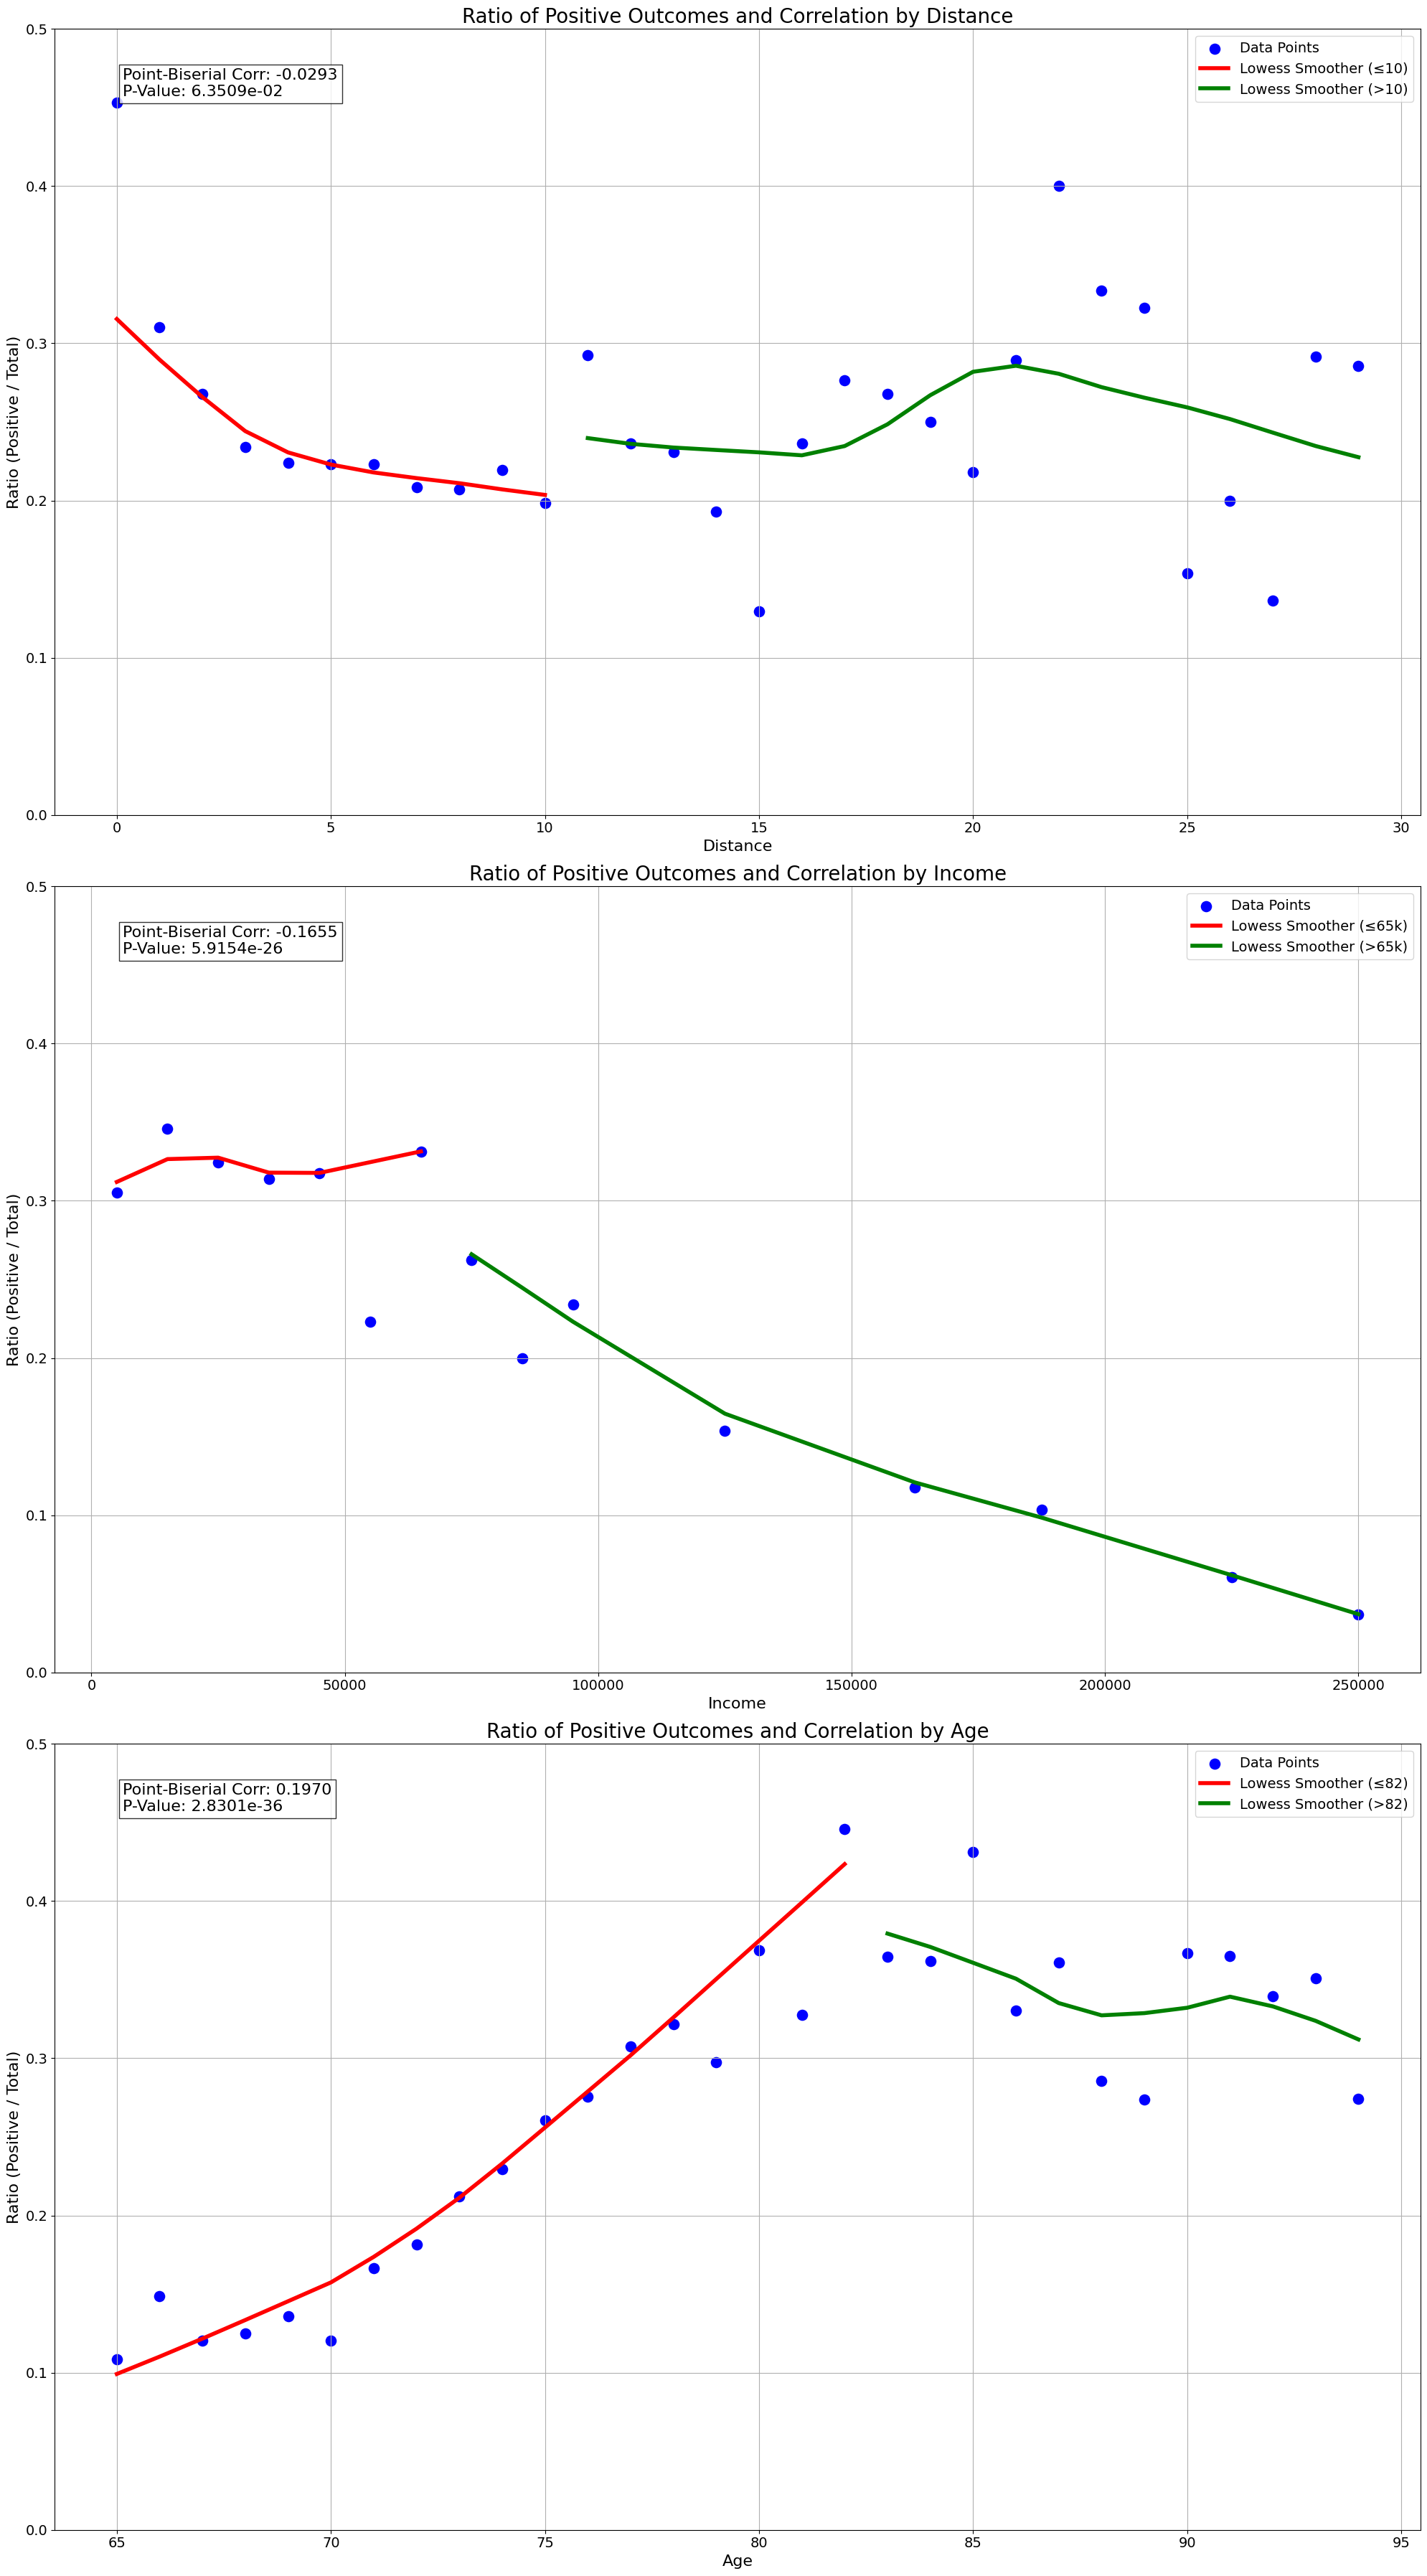

In [13]:
import seaborn as sns
from scipy.stats import pointbiserialr

def plot_ratio_positive_negative_with_corr(df, continuous_var, categorical_var='target', positive_value=1, negative_value=0):
    grouped = df.groupby([continuous_var, categorical_var]).size().reset_index(name='count')
    pivot = grouped.pivot(index=continuous_var, columns=categorical_var, values='count').fillna(0)
    
    positive_counts = pivot[positive_value] if positive_value in pivot.columns else 0
    total_counts = positive_counts + pivot[negative_value] if negative_value in pivot.columns else positive_counts
    ratio = positive_counts / (total_counts + 1e-9)
    
    plot_df = pd.DataFrame({continuous_var: ratio.index, 'ratio_positive_negative': ratio.values})
    return plot_df, *pointbiserialr(df[continuous_var], df[categorical_var])


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 36))

dist_plot_df, dist_corr, dist_p = plot_ratio_positive_negative_with_corr(data, 'dist', 'target')
sns.scatterplot(x='dist', y='ratio_positive_negative', data=dist_plot_df, color='blue', s=150, label='Data Points', ax=ax1)

dist_plot_df_lt10 = dist_plot_df[dist_plot_df['dist'] <= 10]
dist_plot_df_gt10 = dist_plot_df[dist_plot_df['dist'] > 10]

sns.regplot(x='dist', y='ratio_positive_negative', data=dist_plot_df_lt10, scatter=False,
            lowess=True, color='red', line_kws={'lw': 4}, label='Lowess Smoother (≤10)', ax=ax1)
sns.regplot(x='dist', y='ratio_positive_negative', data=dist_plot_df_gt10, scatter=False,
            lowess=True, color='green', line_kws={'lw': 4}, label='Lowess Smoother (>10)', ax=ax1)

ax1.text(0.05, 0.95, f'Point-Biserial Corr: {dist_corr:.4f}\nP-Value: {dist_p:.4e}', transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
ax1.set_title('Ratio of Positive Outcomes and Correlation by Distance', fontsize=20)
ax1.set_xlabel('Distance', fontsize=16)
ax1.set_ylabel('Ratio (Positive / Total)', fontsize=16)
ax1.set_ylim(0, 0.50)
ax1.legend(fontsize=14)
ax1.grid(True)
ax1.tick_params(labelsize=14)

income_plot_df, income_corr, income_p = plot_ratio_positive_negative_with_corr(data, 'income', 'target')
sns.scatterplot(x='income', y='ratio_positive_negative', data=income_plot_df, color='blue', s=150, label='Data Points', ax=ax2)

income_plot_df_lt65k = income_plot_df[income_plot_df['income'] <= 65000]
income_plot_df_gt65k = income_plot_df[income_plot_df['income'] > 65000]

sns.regplot(x='income', y='ratio_positive_negative', data=income_plot_df_lt65k, scatter=False,
            lowess=True, color='red', line_kws={'lw': 4}, label='Lowess Smoother (≤65k)', ax=ax2)
sns.regplot(x='income', y='ratio_positive_negative', data=income_plot_df_gt65k, scatter=False,
            lowess=True, color='green', line_kws={'lw': 4}, label='Lowess Smoother (>65k)', ax=ax2)

ax2.text(0.05, 0.95, f'Point-Biserial Corr: {income_corr:.4f}\nP-Value: {income_p:.4e}', transform=ax2.transAxes, fontsize=16, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
ax2.set_title('Ratio of Positive Outcomes and Correlation by Income', fontsize=20)
ax2.set_xlabel('Income', fontsize=16)
ax2.set_ylabel('Ratio (Positive / Total)', fontsize=16)
ax2.set_ylim(0, 0.50)
ax2.legend(fontsize=14)
ax2.grid(True)
ax2.tick_params(labelsize=14)

age_plot_df, age_corr, age_p = plot_ratio_positive_negative_with_corr(data, 'age', 'target')
sns.scatterplot(x='age', y='ratio_positive_negative', data=age_plot_df, color='blue', s=150, label='Data Points', ax=ax3)

age_plot_df_lt82 = age_plot_df[age_plot_df['age'] <= 82]
age_plot_df_gt82 = age_plot_df[age_plot_df['age'] > 82]

sns.regplot(x='age', y='ratio_positive_negative', data=age_plot_df_lt82, scatter=False,
            lowess=True, color='red', line_kws={'lw': 4}, label='Lowess Smoother (≤82)', ax=ax3)
sns.regplot(x='age', y='ratio_positive_negative', data=age_plot_df_gt82, scatter=False,
            lowess=True, color='green', line_kws={'lw': 4}, label='Lowess Smoother (>82)', ax=ax3)

ax3.text(0.05, 0.95, f'Point-Biserial Corr: {age_corr:.4f}\nP-Value: {age_p:.4e}', transform=ax3.transAxes, fontsize=16, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
ax3.set_title('Ratio of Positive Outcomes and Correlation by Age', fontsize=20)
ax3.set_xlabel('Age', fontsize=16)
ax3.set_ylabel('Ratio (Positive / Total)', fontsize=16)
ax3.set_ylim(0, 0.50)
ax3.legend(fontsize=14)
ax3.grid(True)
ax3.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

These predictors are relatively weak individually within the aggregate of the data. They also have mixed effects.

In model testing, "knotting" only the variable age yielded the best results. 

In [14]:
data['age_lt80'] = np.where(data['age'] < 80, data['age'], 80)
data['age_ge80'] = np.where(data['age'] >= 80, data['age'] - 80, 0)
print(data.head())

   id  age  dist  income  gender  marital_status  target  age_lt80  age_ge80
0   1   73     4   95000       1               0       1        73         0
1   2   89     1  125000       1               1       1        80         9
2   3   85     1   15000       0               0       1        80         5
3   4   76     2   95000       1               1       1        76         0
4   5   76     2   15000       1               0       1        76         0


#### Examine strength of categorical predictors while checking for interactions.

In [15]:
predictors = pd.DataFrame({
    'Single': [data[(data['gender'] == 0) & (data['marital_status'] == 0)]['target'].mean(),
               data[(data['gender'] == 1) & (data['marital_status'] == 0)]['target'].mean(),
               data[data['marital_status'] == 0]['target'].mean()],
    'Married': [data[(data['gender'] == 0) & (data['marital_status'] == 1)]['target'].mean(),
                data[(data['gender'] == 1) & (data['marital_status'] == 1)]['target'].mean(),
                data[data['marital_status'] == 1]['target'].mean()],
    'Overall for gender': [data[data['gender'] == 0]['target'].mean(),
                data[data['gender'] == 1]['target'].mean(),
                None]
}, index=['Female', 'Male', 'Overall for marital_status'])

print("Proportion of Gender and Marital_Status subset that responded")
print(predictors)

Proportion of Gender and Marital_Status subset that responded
                              Single   Married  Overall for gender
Female                      0.224093  0.219920             0.22151
Male                        0.214156  0.304501             0.27927
Overall for marital_status  0.219955  0.264849                 NaN


Gender effects relationship between marital_status and response. 

##### Evaluate Logistic Regression Model with every possible combination of interaction terms and select combination with best performance. Model performance is measured by the percentage of total responses captured among the top 40% of customers, ranked by predicted response probability visualized in a lift chart. 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import combinations

base_features = ['age_lt80', 'age_ge80', 'dist', 'income', 'gender', 'marital_status']
interaction_terms = [
    ('age_lt80', 'dist'), ('age_lt80', 'income'), ('age_lt80', 'gender'), ('age_lt80', 'marital_status'),
    ('age_ge80', 'dist'), ('age_ge80', 'income'), ('age_ge80', 'gender'), ('age_ge80', 'marital_status'),
    ('dist', 'income'), ('dist', 'gender'), ('dist', 'marital_status'),
    ('income', 'gender'), ('income', 'marital_status'), ('gender', 'marital_status')
]

results = []

for r in range(len(interaction_terms) + 1):
    for terms in combinations(interaction_terms, r):
        X = data[base_features].copy()
        
        for t1, t2 in terms:
            X[f'{t1}_{t2}'] = X[t1] * X[t2]
            
        y = data['target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=0)
        y_pred_proba_test = model.predict(sm.add_constant(X_test))
        
        test_data = pd.DataFrame({'target': y_test, 'predicted_probs': y_pred_proba_test})
        test_data_sorted = test_data.sort_values('predicted_probs', ascending=False)
        
        total_pos = test_data_sorted['target'].sum()
        n_rows = len(test_data_sorted)
        cutoff_index = int(0.4 * n_rows)
        lift_at_40 = test_data_sorted.iloc[:cutoff_index]['target'].sum() / total_pos * 100
        
        results.append({
            'interactions': terms,
            'lift_at_40': lift_at_40
        })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('lift_at_40', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("\nbest interaction term combinations by lift at 40%:")
print(results_df.head(1))


Top 10 interaction combinations by lift at 40%:
                                                                                                                                                                       interactions  \
10034  ((age_lt80, dist), (age_lt80, income), (age_lt80, gender), (age_lt80, marital_status), (age_ge80, income), (dist, income), (dist, marital_status), (gender, marital_status))   

       lift_at_40  
10034   62.672811  


#### Logistic Regression Model evaluated with best combination of interaction terms.

Yield at 40%: 62.7%


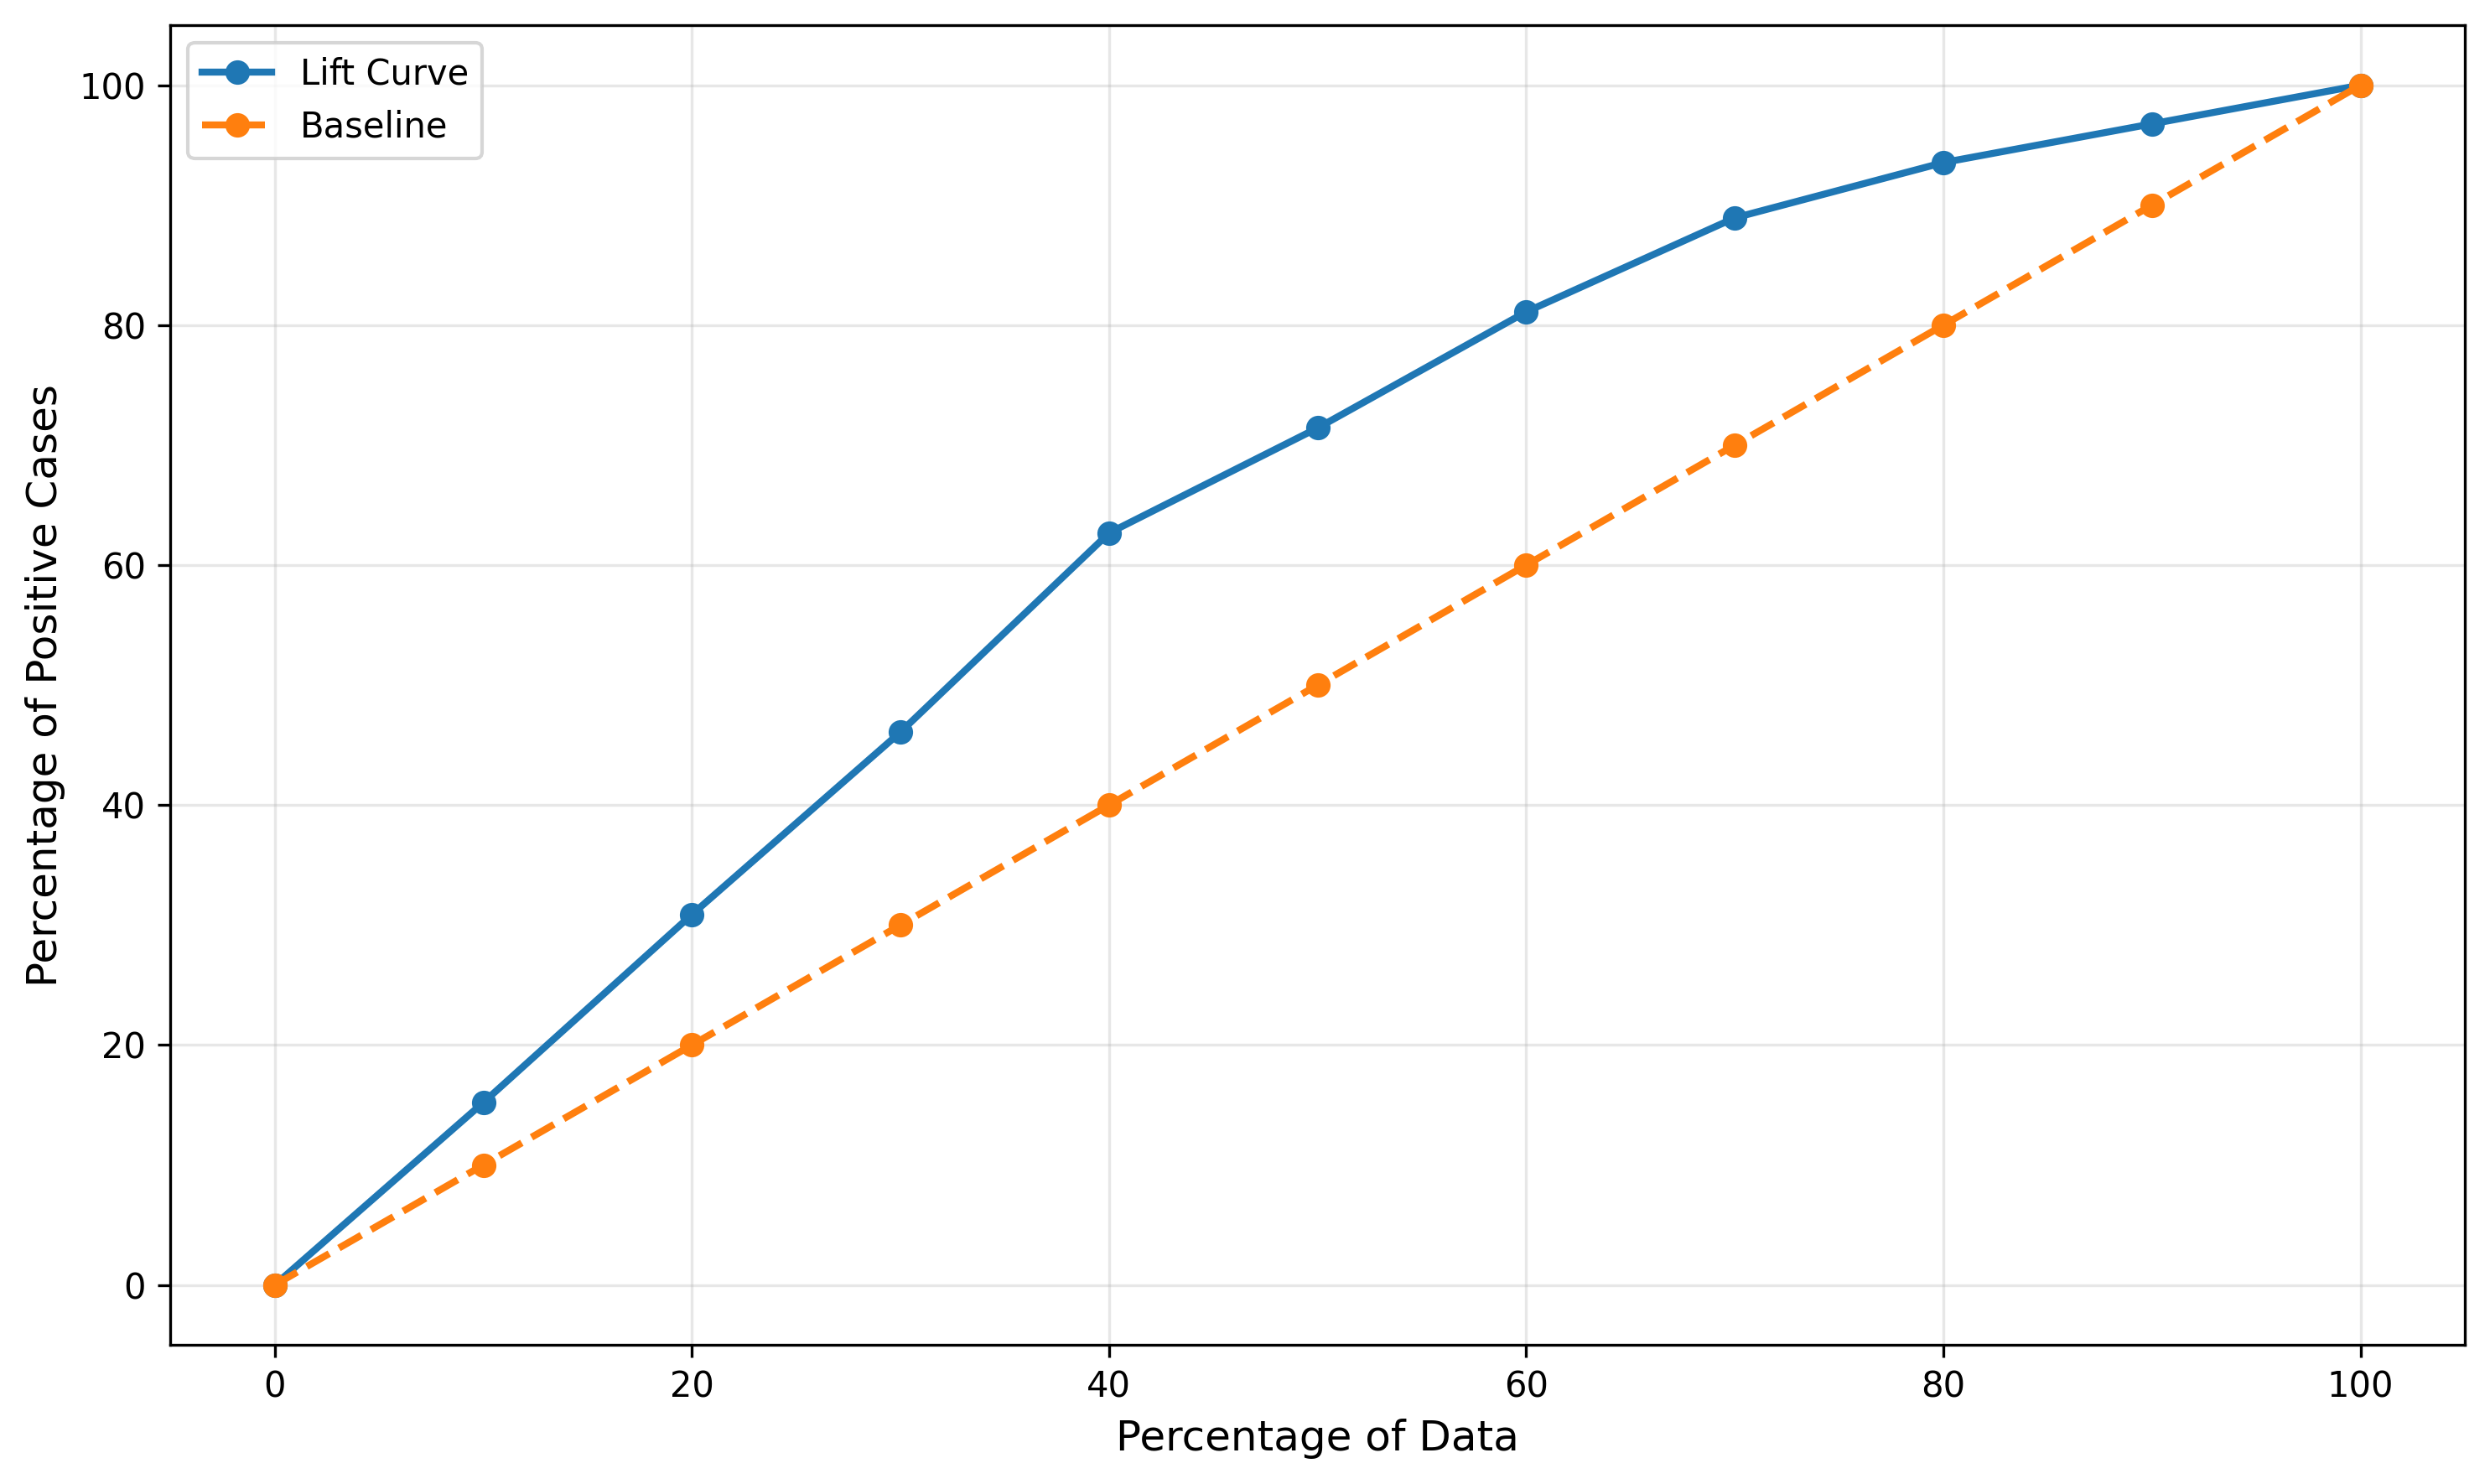

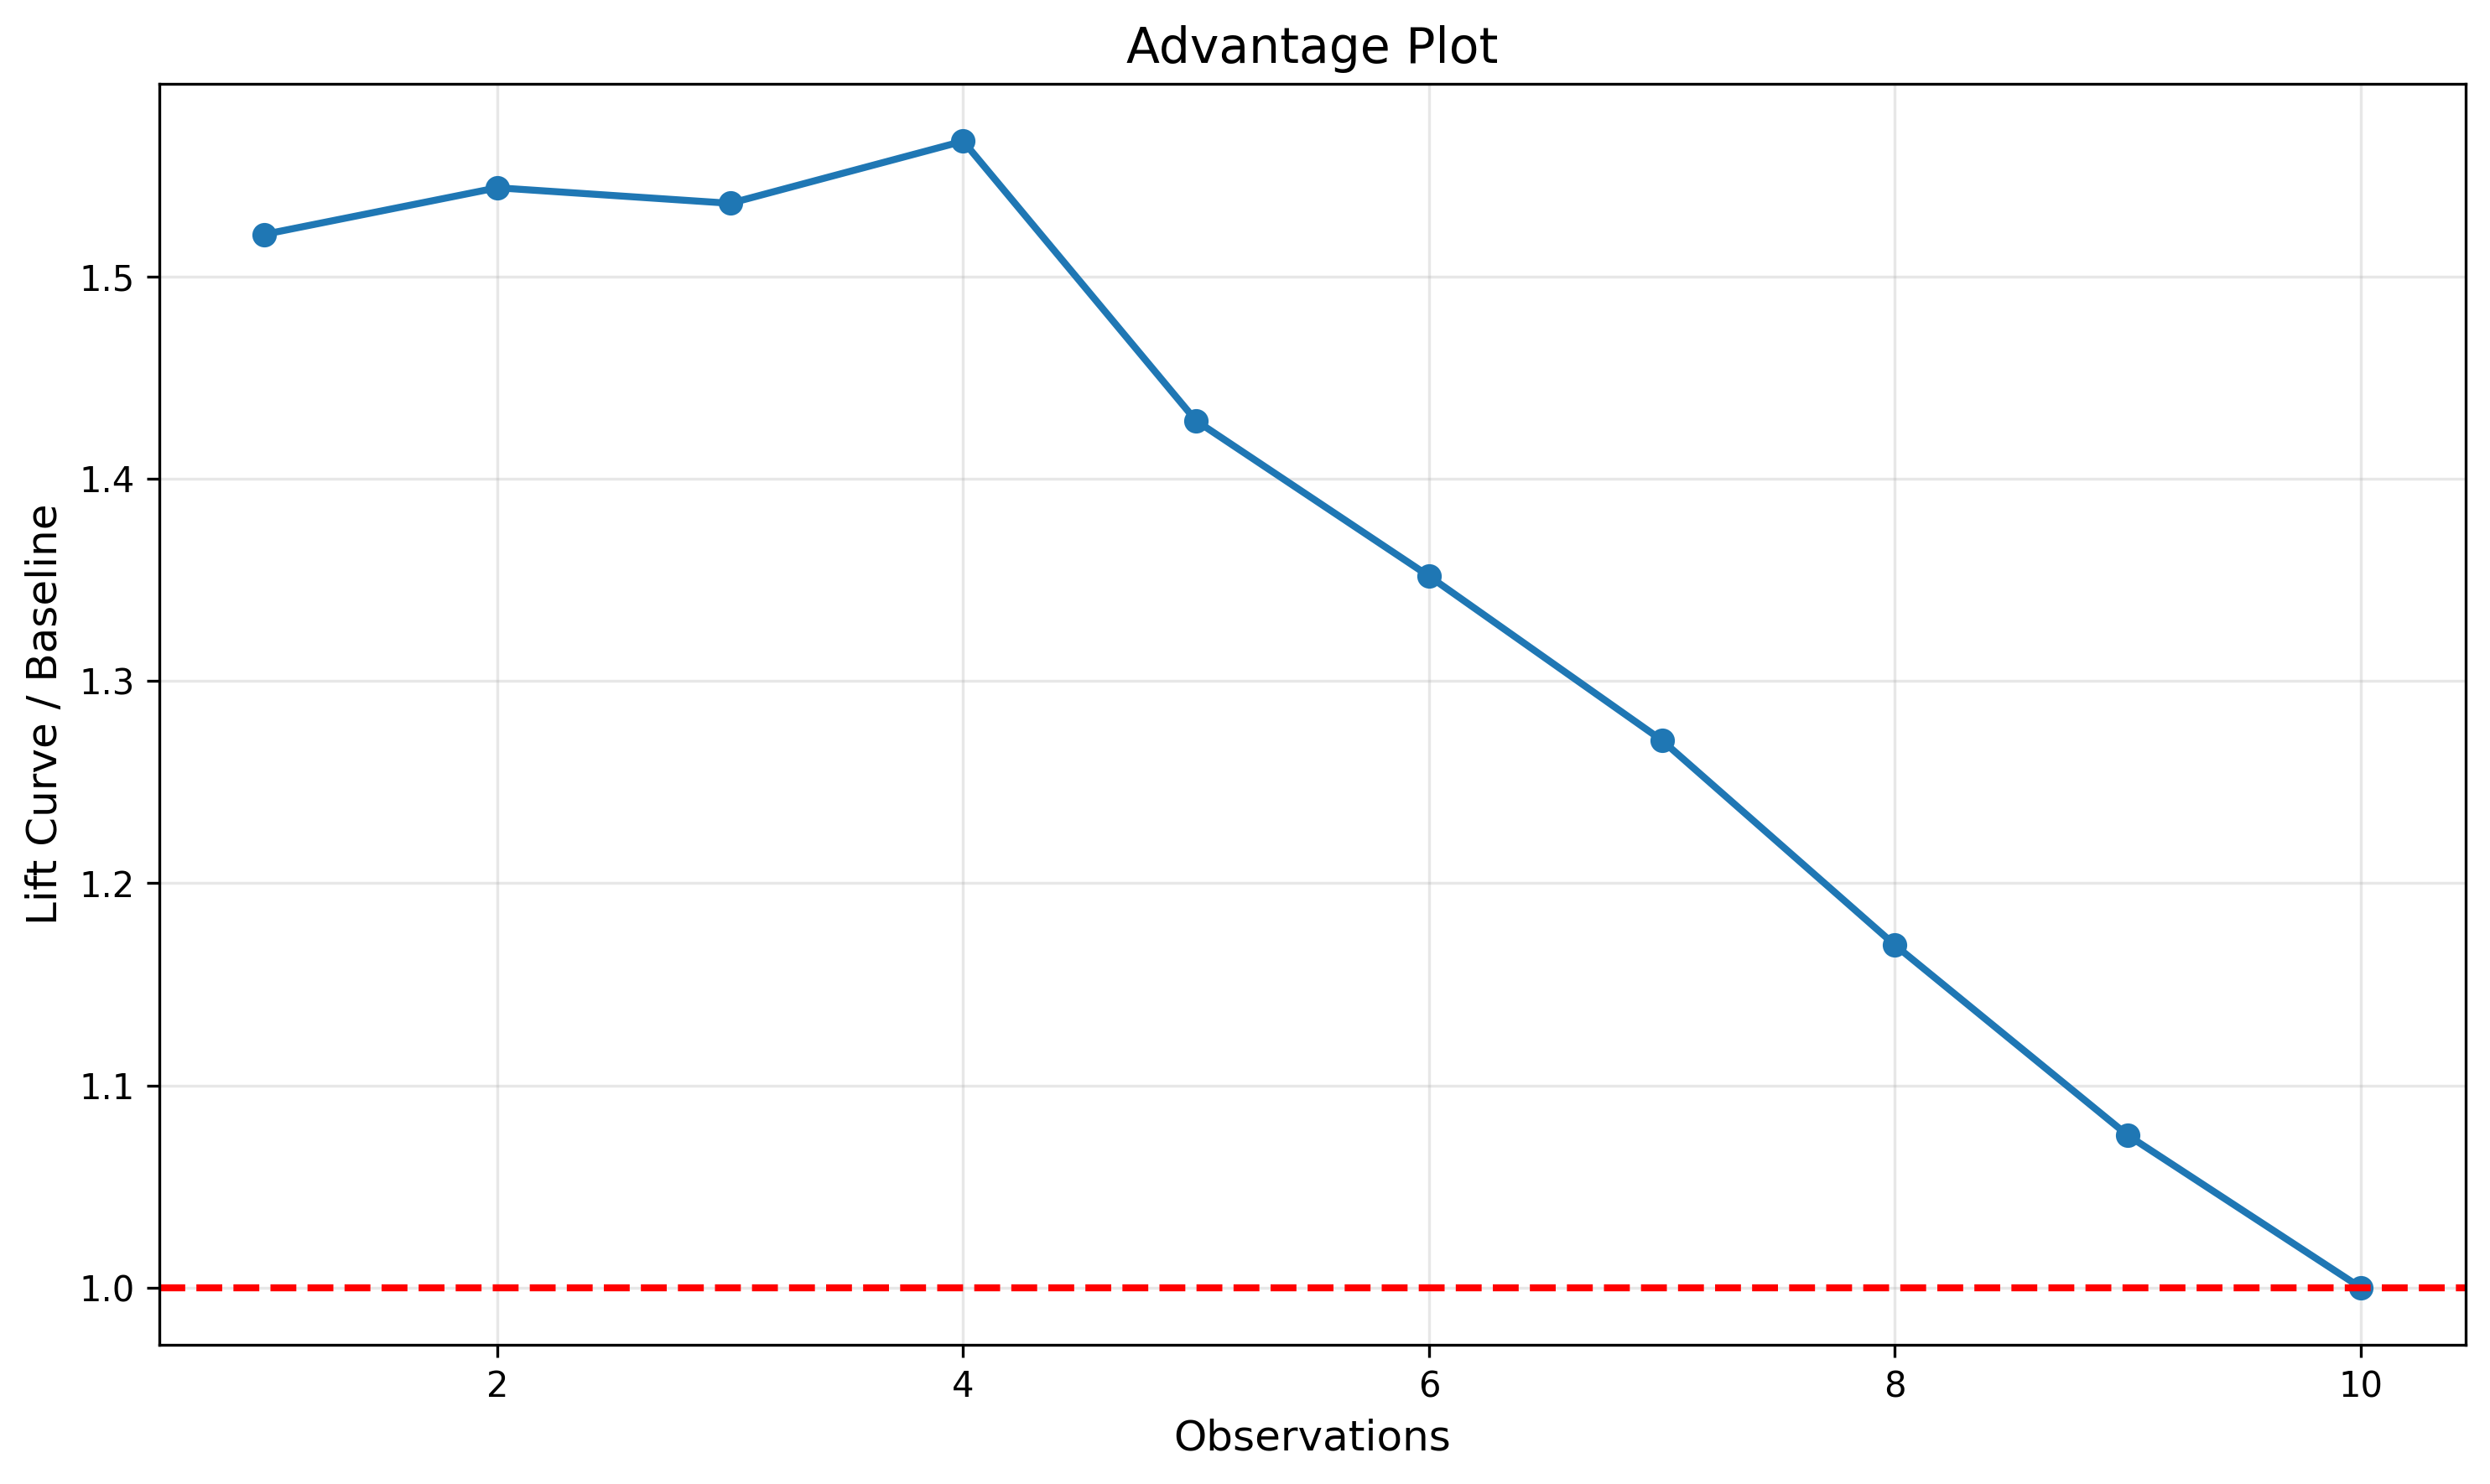

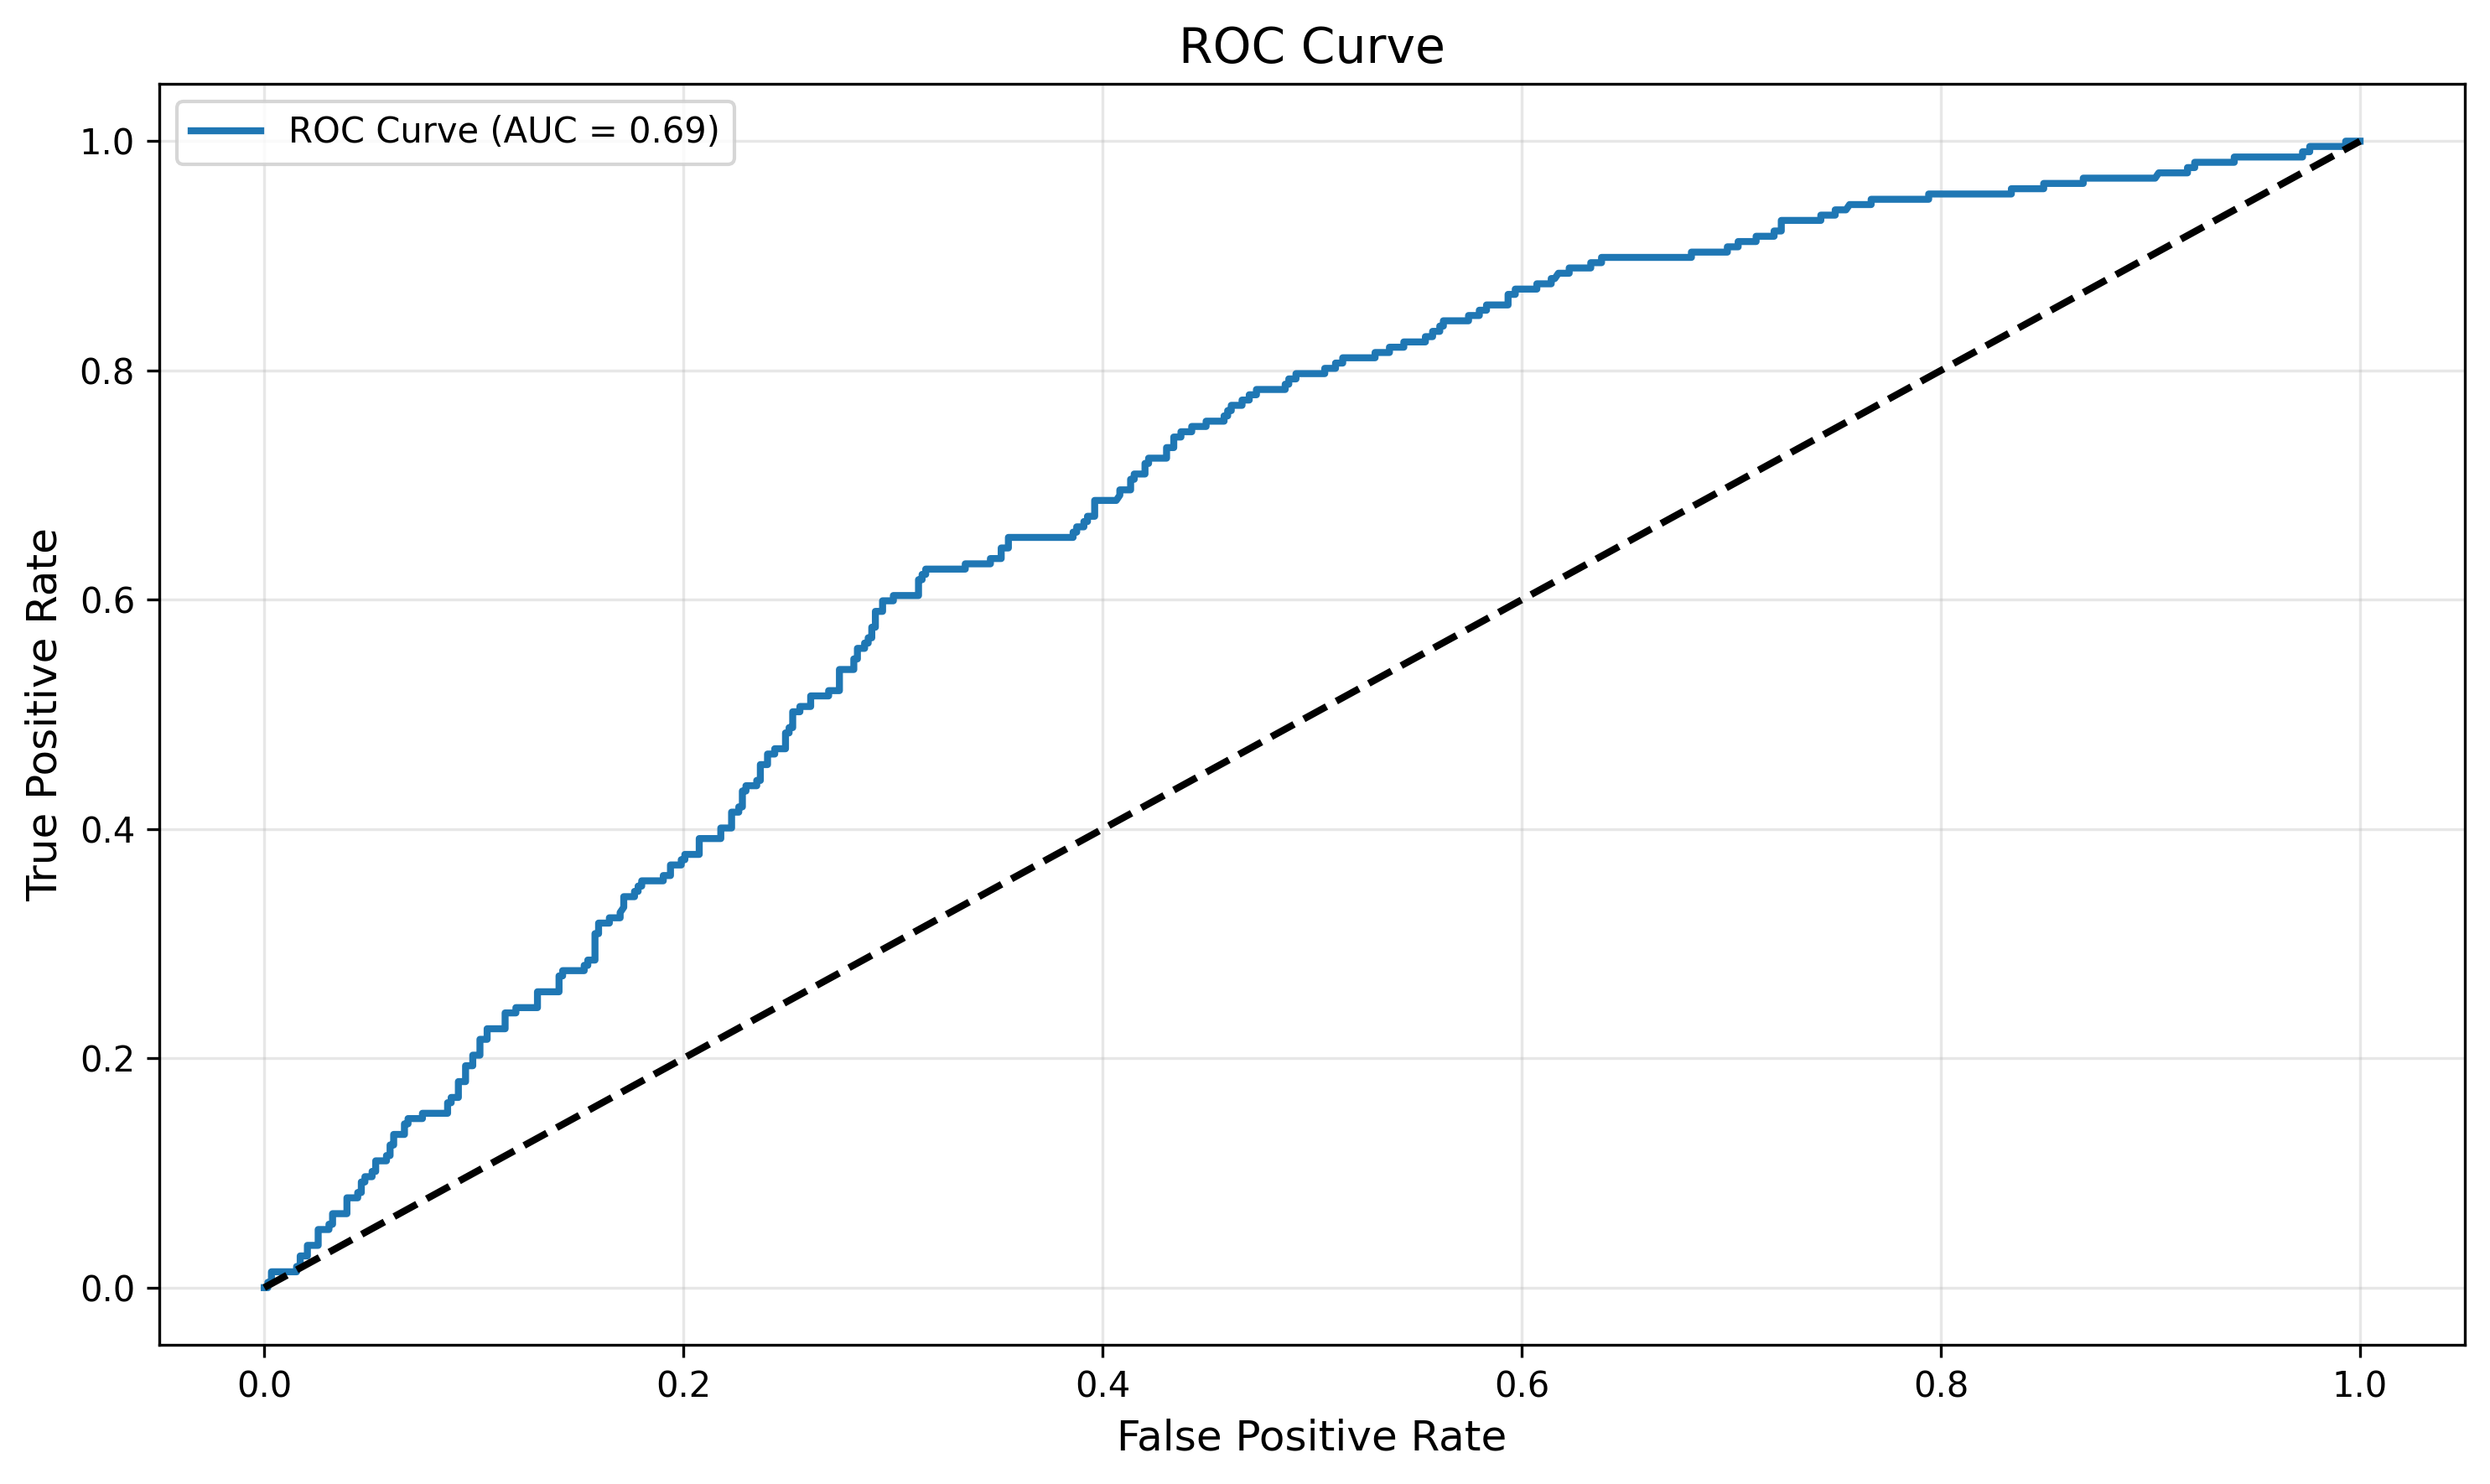

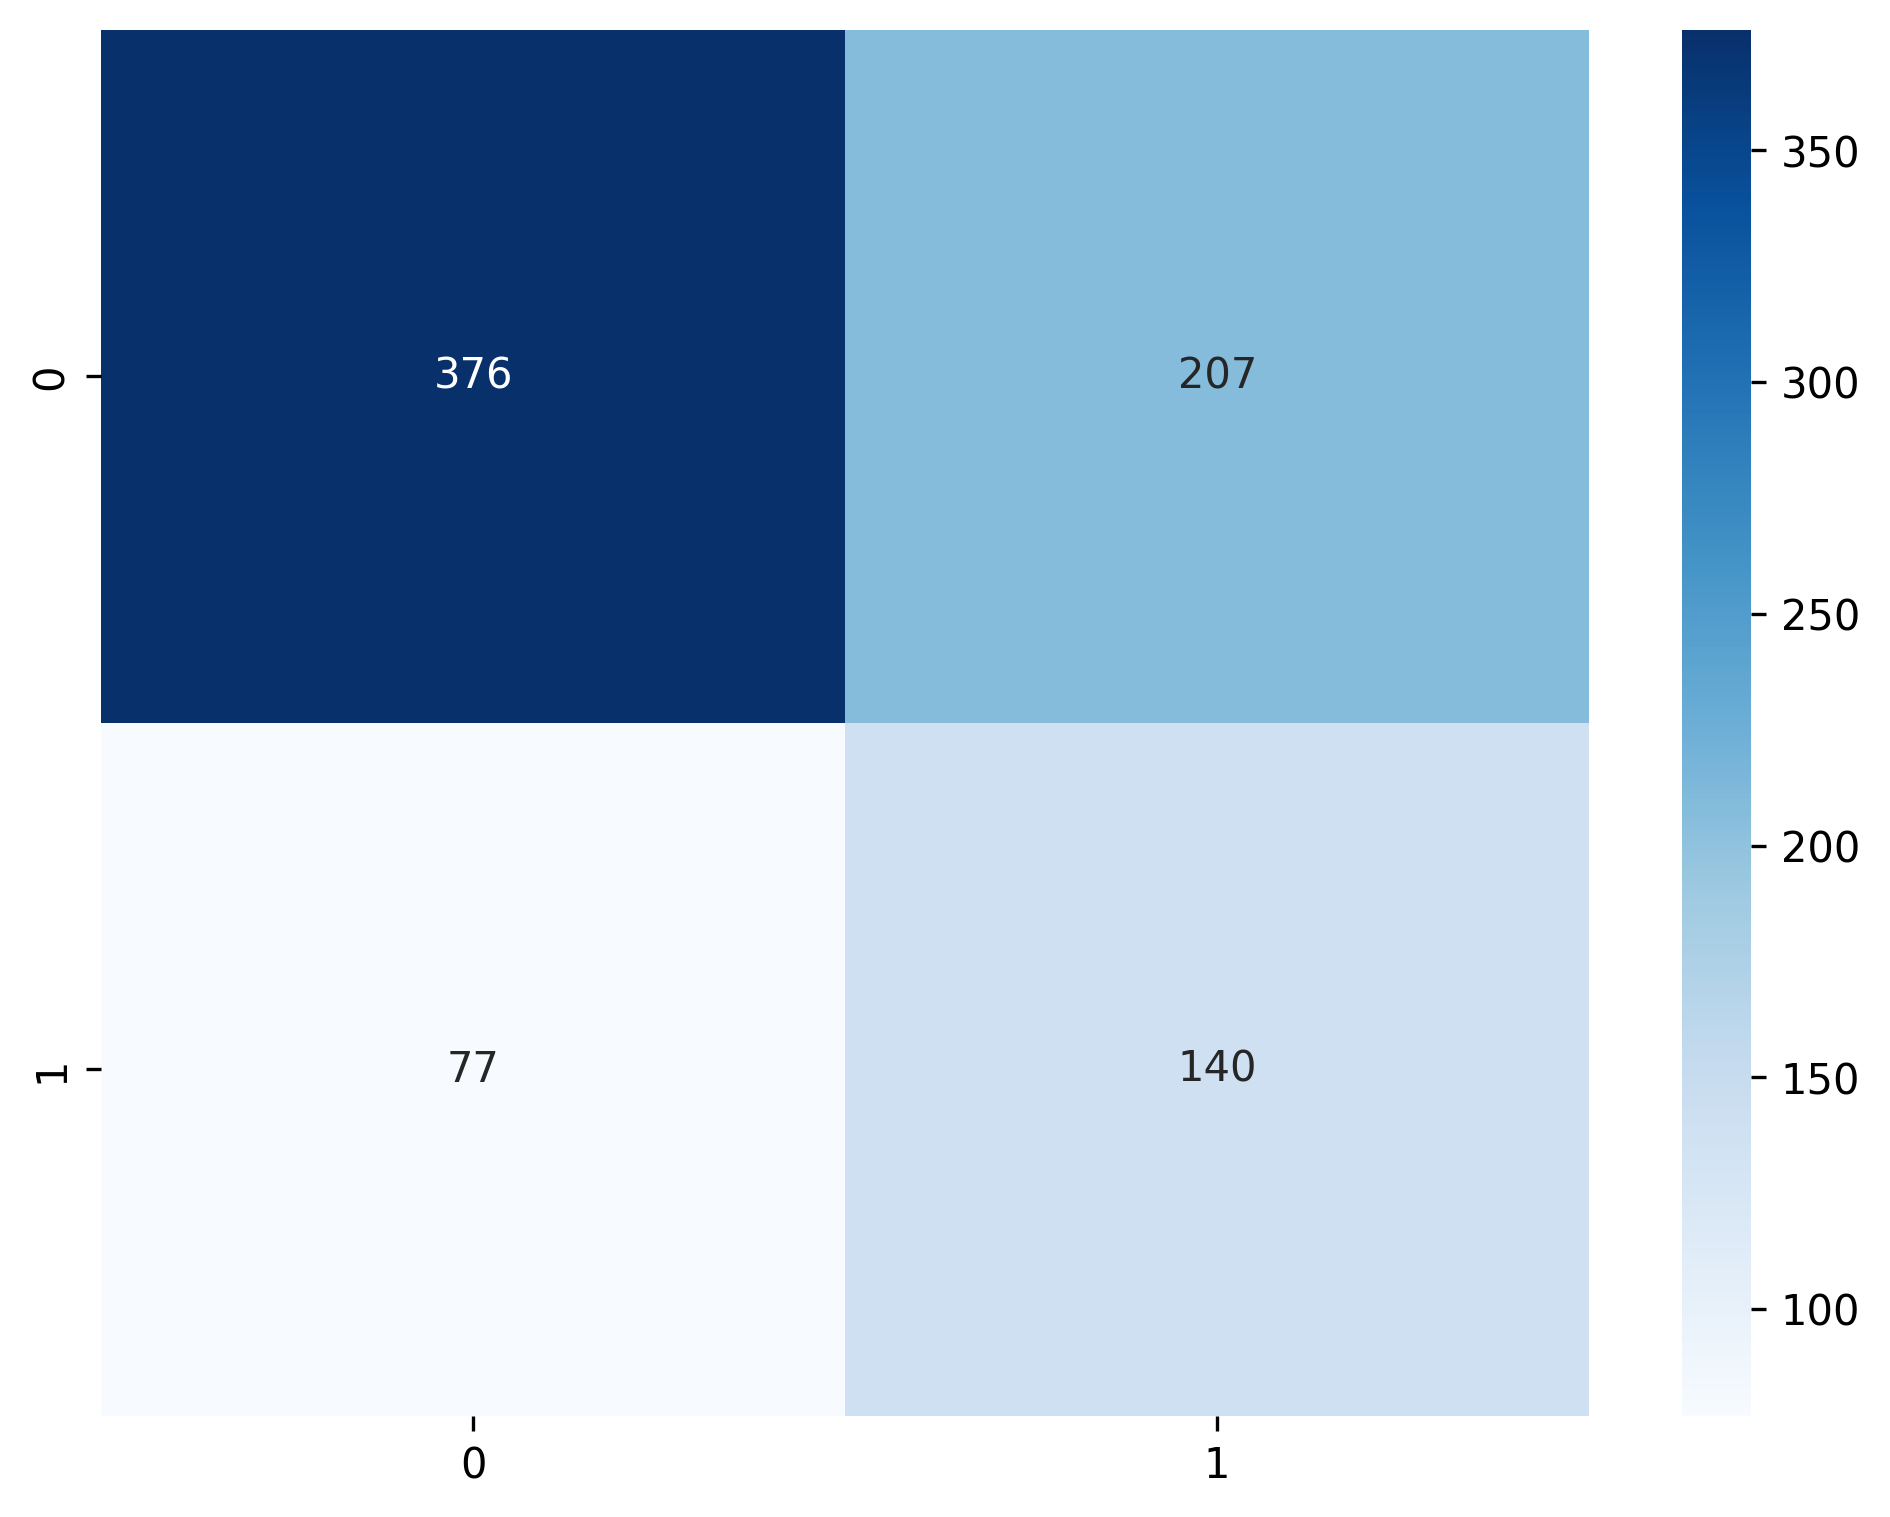


Top 10 observations by predicted probability:
      target  predicted_probs  age_lt80  age_ge80  dist  income  gender  \
1405       0         0.599455        80         0     2    5000       1   
2586       1         0.579098        80         1     0   15000       1   
184        0         0.572839        80         5     1    5000       1   
3331       1         0.569536        80         1     3   15000       1   
279        1         0.568641        80         0     5   15000       1   
2682       0         0.549747        80         4     4   15000       1   
893        0         0.547198        80         1     3   25000       1   
862        0         0.541378        80        10     2    5000       1   
63         0         0.540583        80         1     0   35000       1   
3379       0         0.538233        80         2    11   15000       1   

      marital_status  
1405               1  
2586               1  
184                1  
3331               1  
279         

In [33]:
best_terms = results_df.iloc[0]['interactions']

X = data[base_features].copy()
for t1, t2 in best_terms:
    X[f'{t1}_{t2}'] = X[t1] * X[t2]

y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=0)
y_pred_proba_test = model.predict(sm.add_constant(X_test))

test_data = pd.DataFrame({'target': y_test, 'predicted_probs': y_pred_proba_test})
for col in X_test.columns:
    test_data[col] = X_test[col]
test_data_sorted = test_data.sort_values('predicted_probs', ascending=False)

total_pos = test_data_sorted['target'].sum()
n_rows = len(test_data_sorted)
deciles = np.linspace(0, n_rows, 11, dtype=int)
lift_curve = [test_data_sorted.iloc[:i]['target'].sum() / total_pos * 100 for i in deciles]
baseline = np.linspace(0, 100, 11)

print(f'Yield at 40%: {lift_curve[4]:.1f}%')

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(baseline, lift_curve, marker='o', label='Lift Curve', linewidth=2)
plt.plot(baseline, baseline, linestyle='--', marker='o', label='Baseline', linewidth=2)
plt.xlabel('Percentage of Data', fontsize=12)
plt.ylabel('Percentage of Positive Cases', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(range(11), np.array(lift_curve) / baseline, marker='o', linewidth=2)
plt.axhline(y=1, linestyle='--', color='r', linewidth=2)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Lift Curve / Baseline', fontsize=12)
plt.title('Advantage Plot', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)
optimal_threshold = thresholds[np.argmin(np.abs(tpr - (1-fpr)))]

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, (y_pred_proba_test >= optimal_threshold).astype(int)), annot=True, fmt='d', cmap='Blues')
plt.show()

print("\nTop 10 observations by predicted probability:")
print(test_data_sorted[['target', 'predicted_probs'] + base_features].head(10))

print("\nBottom 10 observations by predicted probability:")
print(test_data_sorted[['target', 'predicted_probs'] + base_features].tail(10))


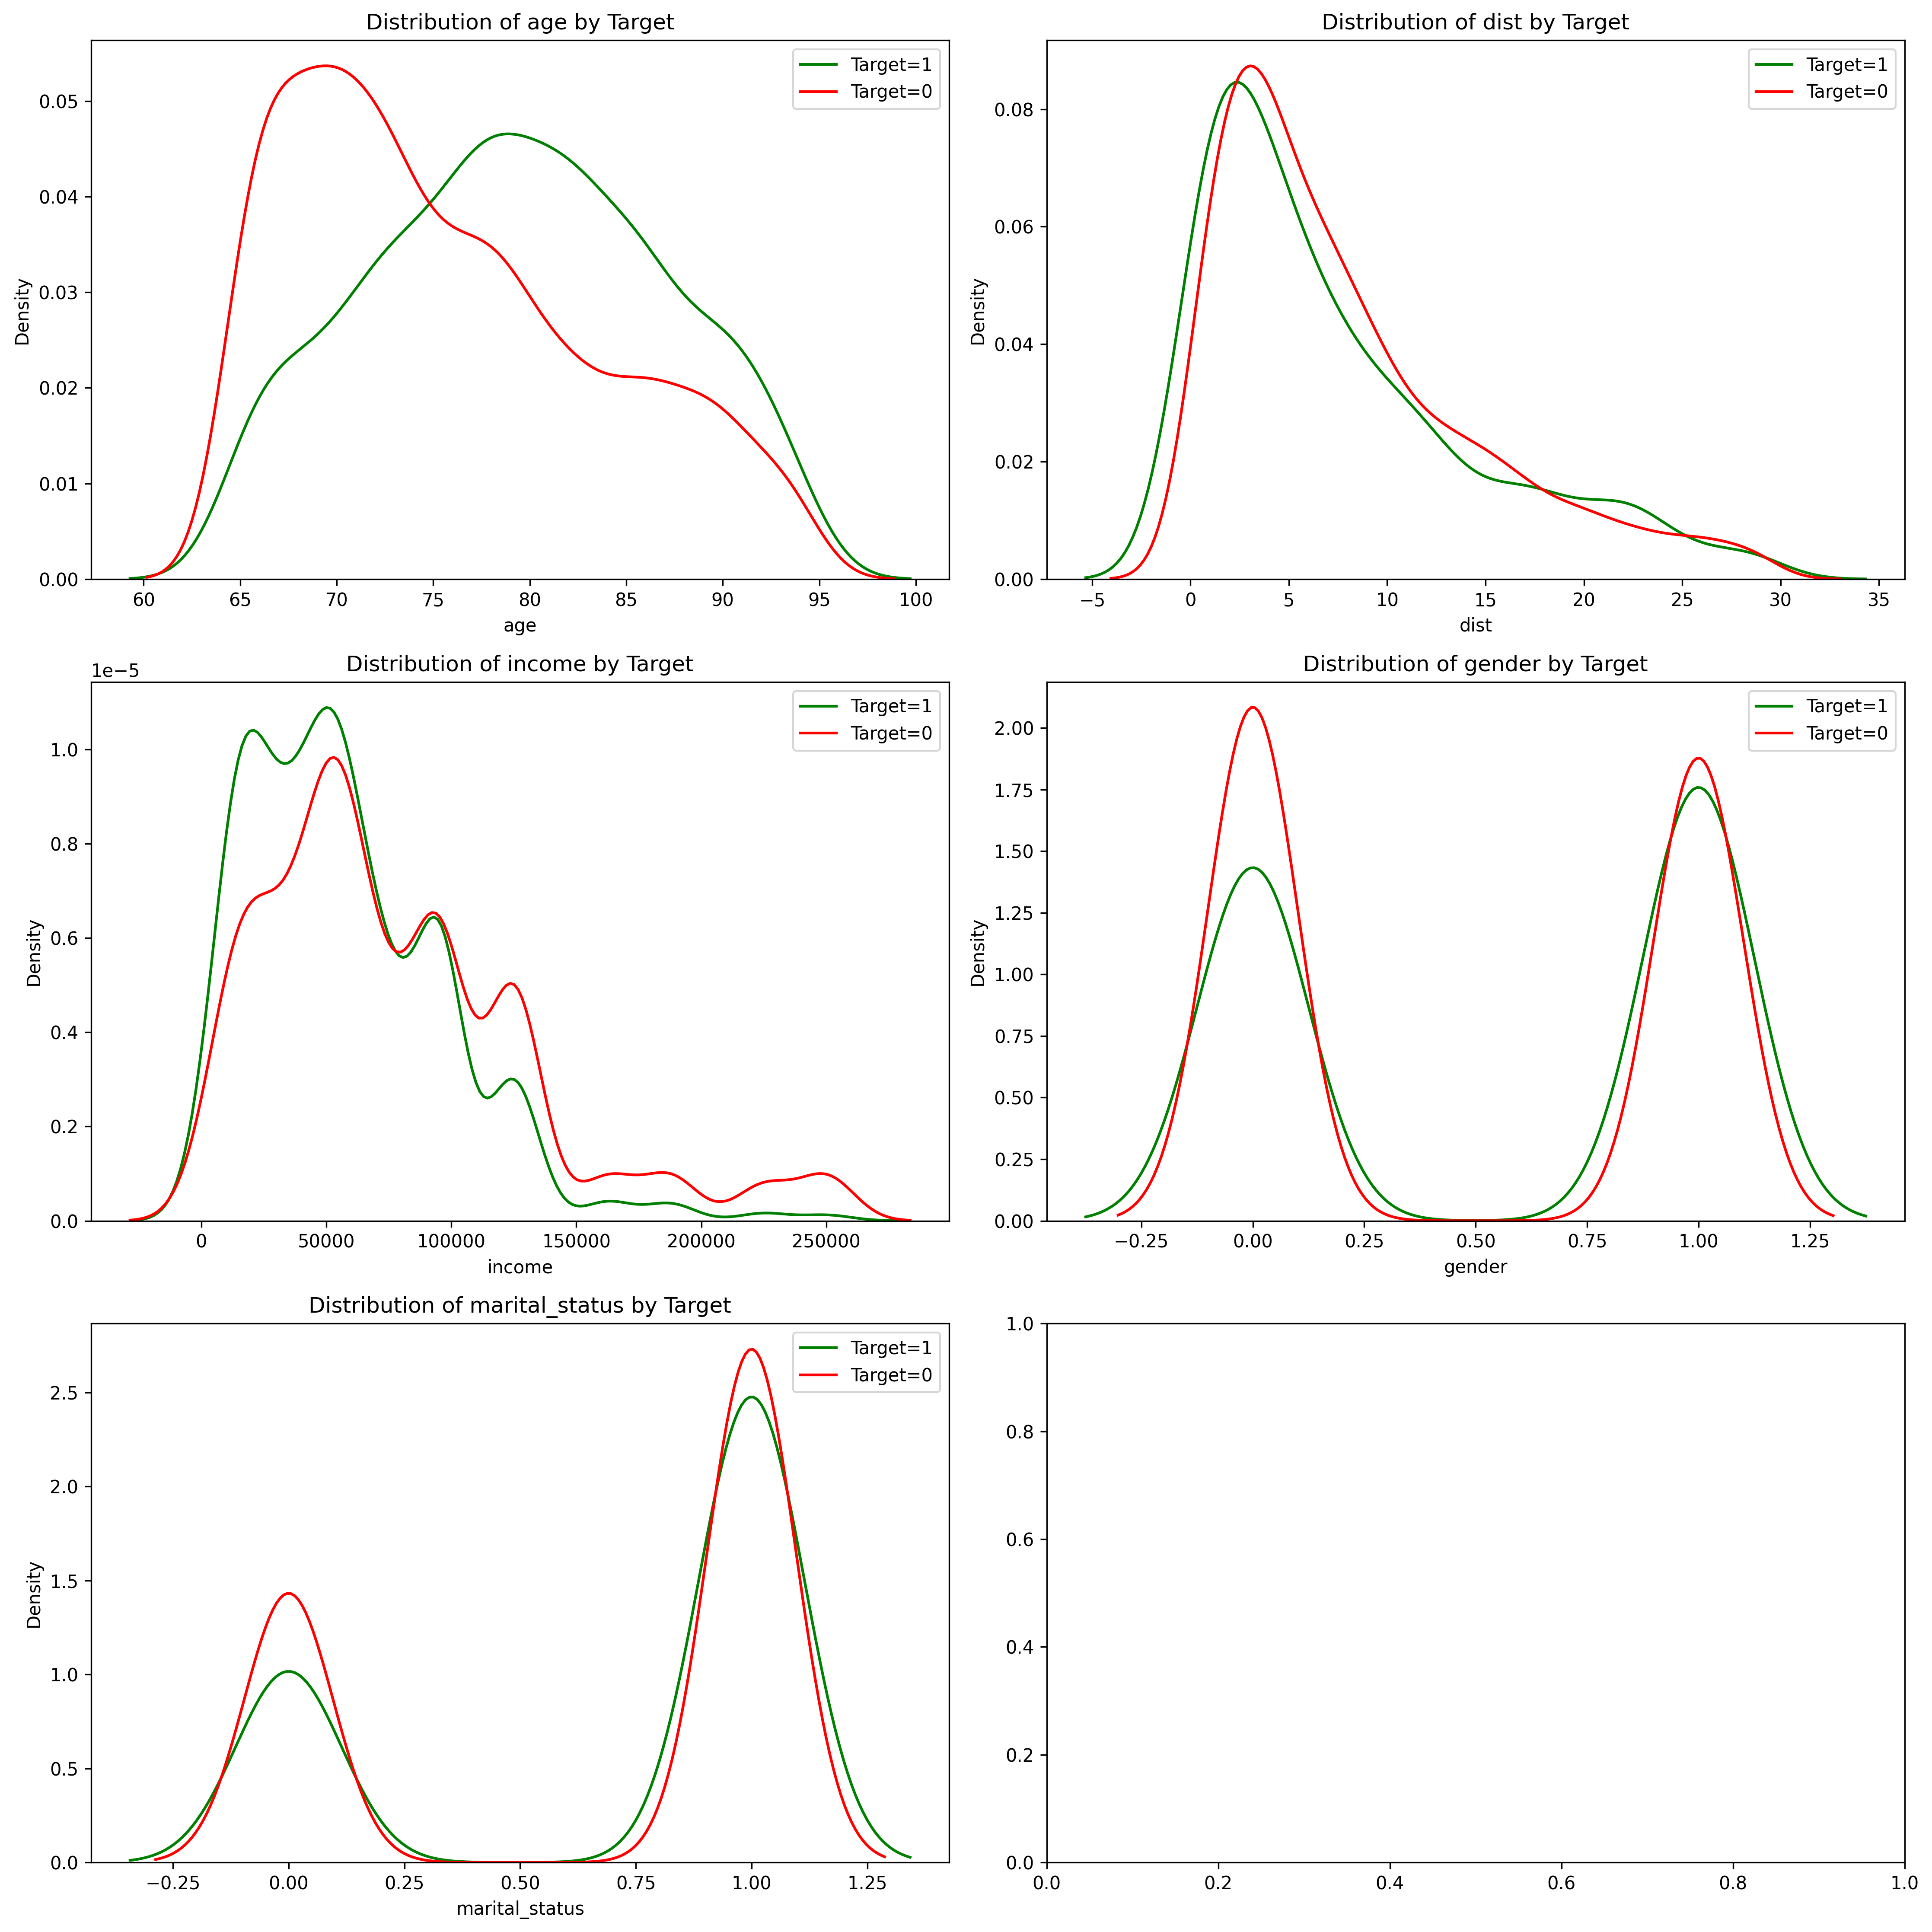

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(15, 15), dpi=300)
axes = axes.ravel()

variables = ['age', 'dist', 'income', 'gender', 'marital_status']

for i, var in enumerate(variables):
    sns.kdeplot(data=data[data['target']==1][var], ax=axes[i], label='Target=1', color='green')
    sns.kdeplot(data=data[data['target']==0][var], ax=axes[i], label='Target=0', color='red')
    axes[i].set_title(f'Distribution of {var} by Target')
    axes[i].legend()

plt.tight_layout()
plt.show()

#### As the data lacks strongly predictive patterns between predictors and response, the logistic regression model’s moderate confidence at best in response is actually an appropriate representation of the true relationship available to us in the given data.

To demonstraight this, let's cherry pick the observations of the data which have the qualities where response is most likely. 

In [21]:
filtered_data = data[
    (data['age'].between(79, 85)) & 
    (data['gender'] == 1) & 
    (data['marital_status'] == 1) & 
    (data['income'].between(0, 65000)) &
    (data['dist'].between(0, 5))
]

print("\nFiltered observations matching criteria:")
print(filtered_data[['target', 'age', 'gender', 'marital_status', 'income', 'dist']])
print(f"\nResponse rate in filtered data: {filtered_data['target'].mean():.2%}")


Filtered observations matching criteria:
      target  age  gender  marital_status  income  dist
26         1   84       1               1   45000     4
63         0   81       1               1   35000     0
103        1   82       1               1   65000     4
134        1   83       1               1   45000     1
150        0   83       1               1   45000     4
156        0   85       1               1   45000     2
178        0   81       1               1   55000     2
184        0   85       1               1    5000     1
235        1   82       1               1   35000     3
237        1   84       1               1   35000     2
246        1   85       1               1   55000     0
279        1   80       1               1   15000     5
281        1   79       1               1   65000     2
326        1   81       1               1   15000     4
359        0   84       1               1   55000     4
392        1   80       1               1   15000     1
396   

even when we take a slice out of the data set where response is most likely, At best we get 51.25% response rate. 

Thus, observe what would happen if we evaluated a Random Forest model on this data. 

Training Accuracy: 0.973
Testing Accuracy: 0.679


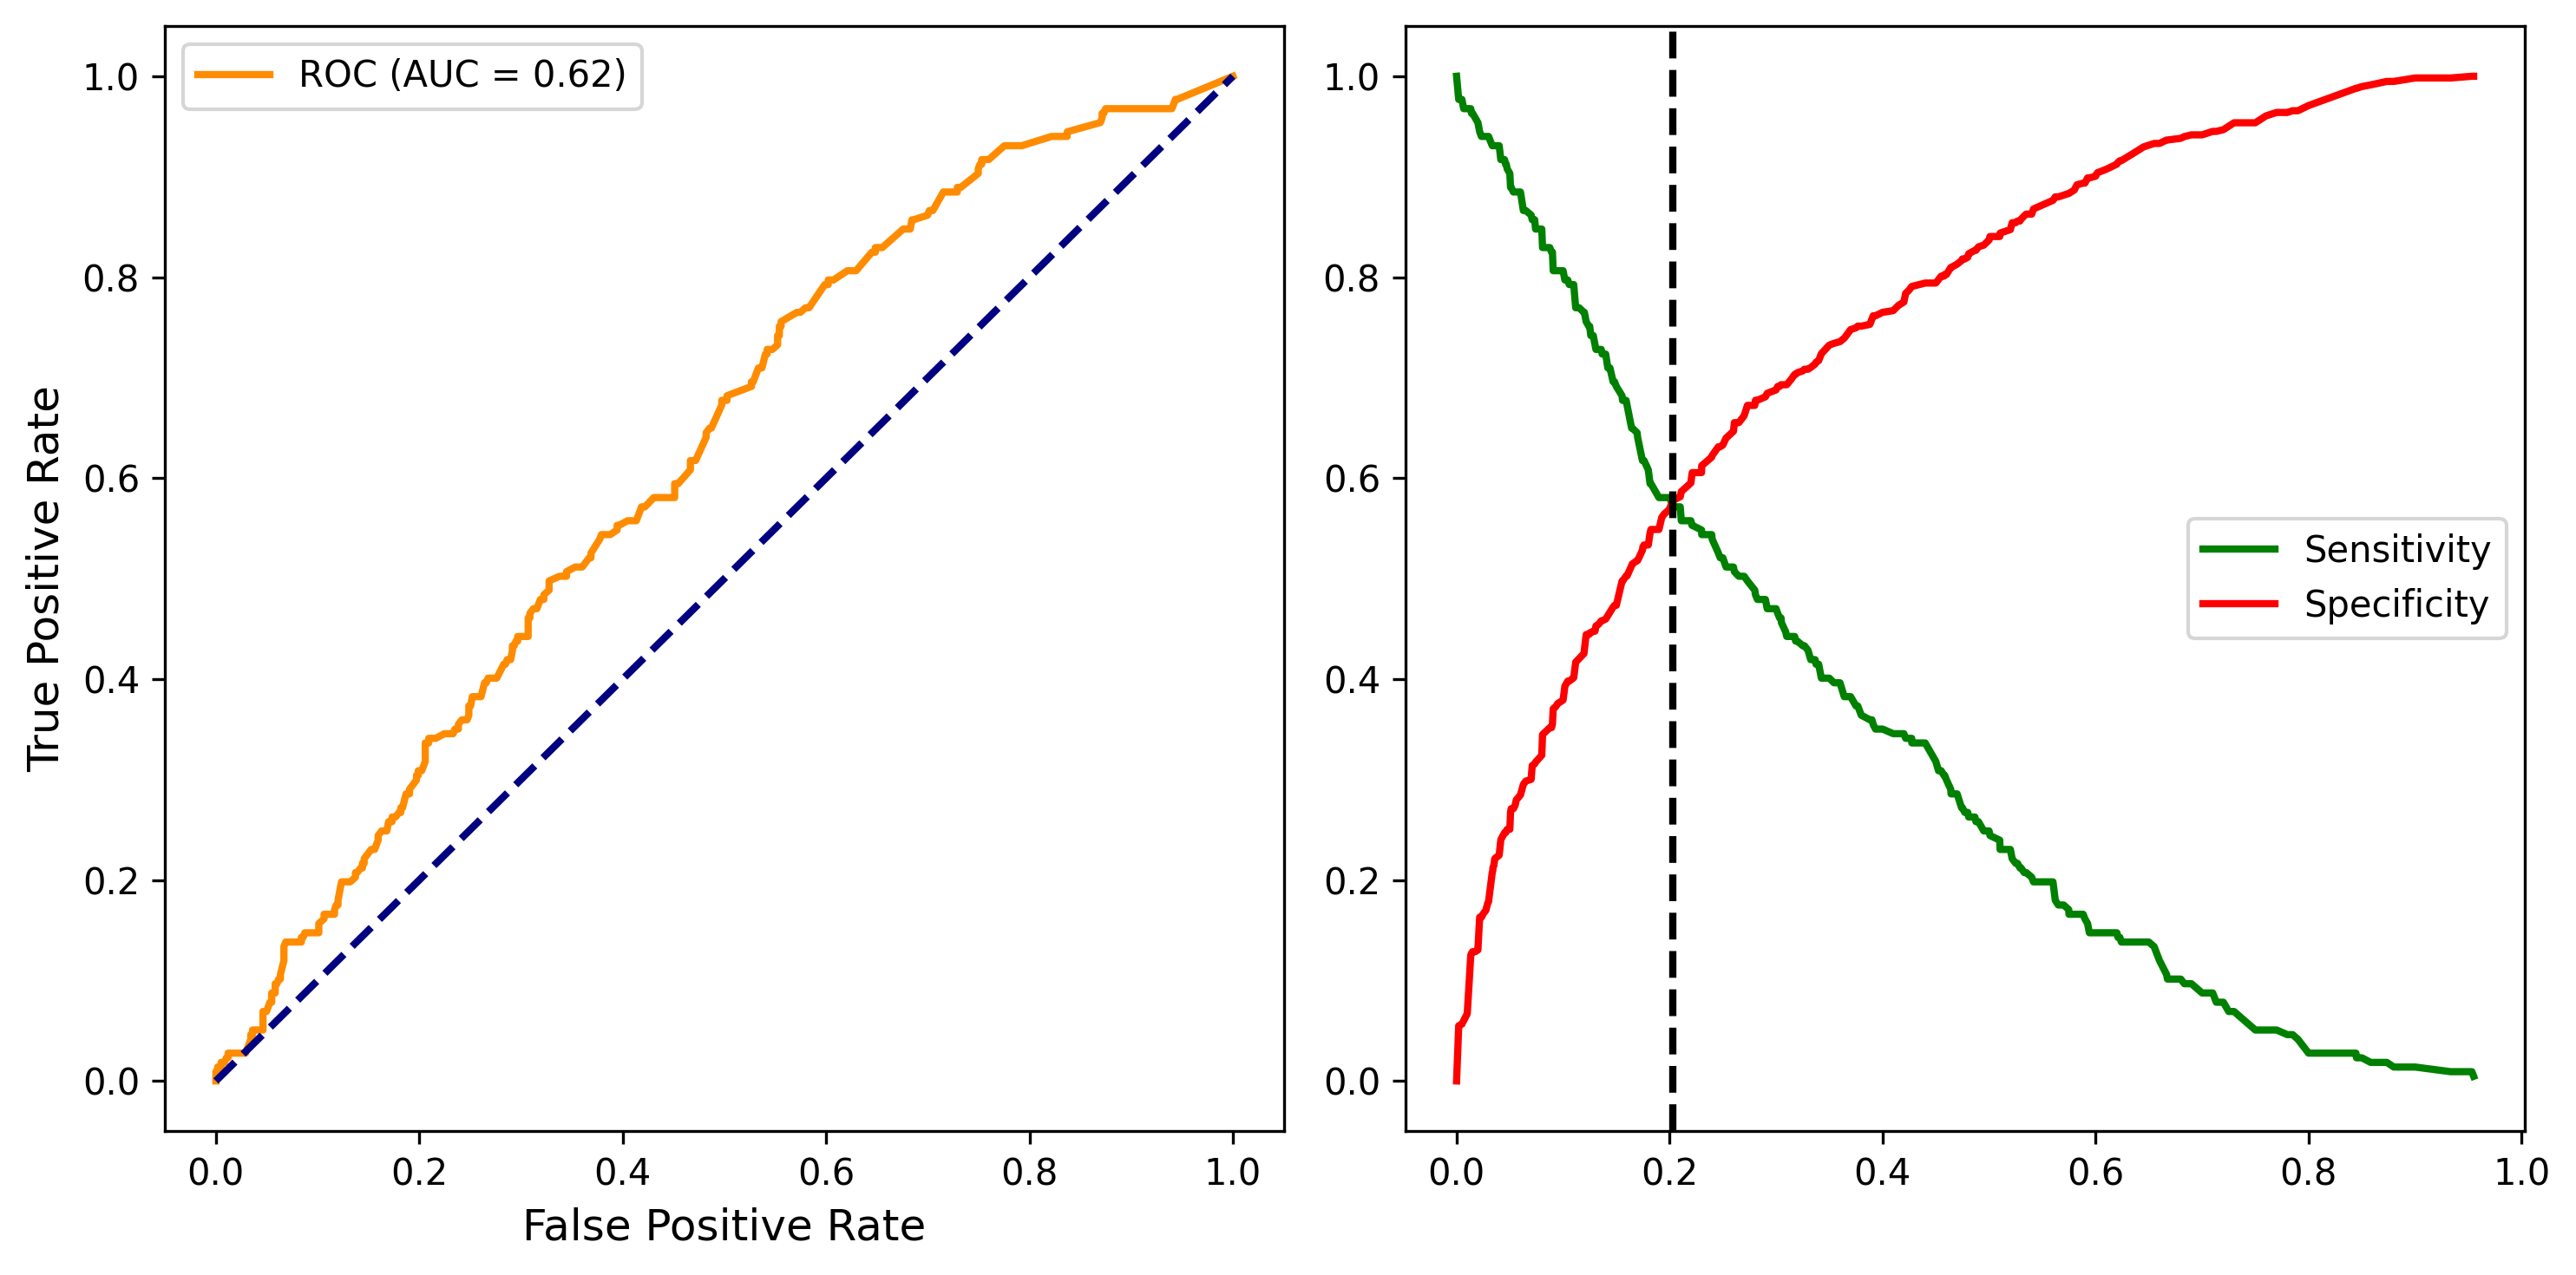

Optimal threshold: 0.203
Sensitivity: 0.571
Specificity: 0.578


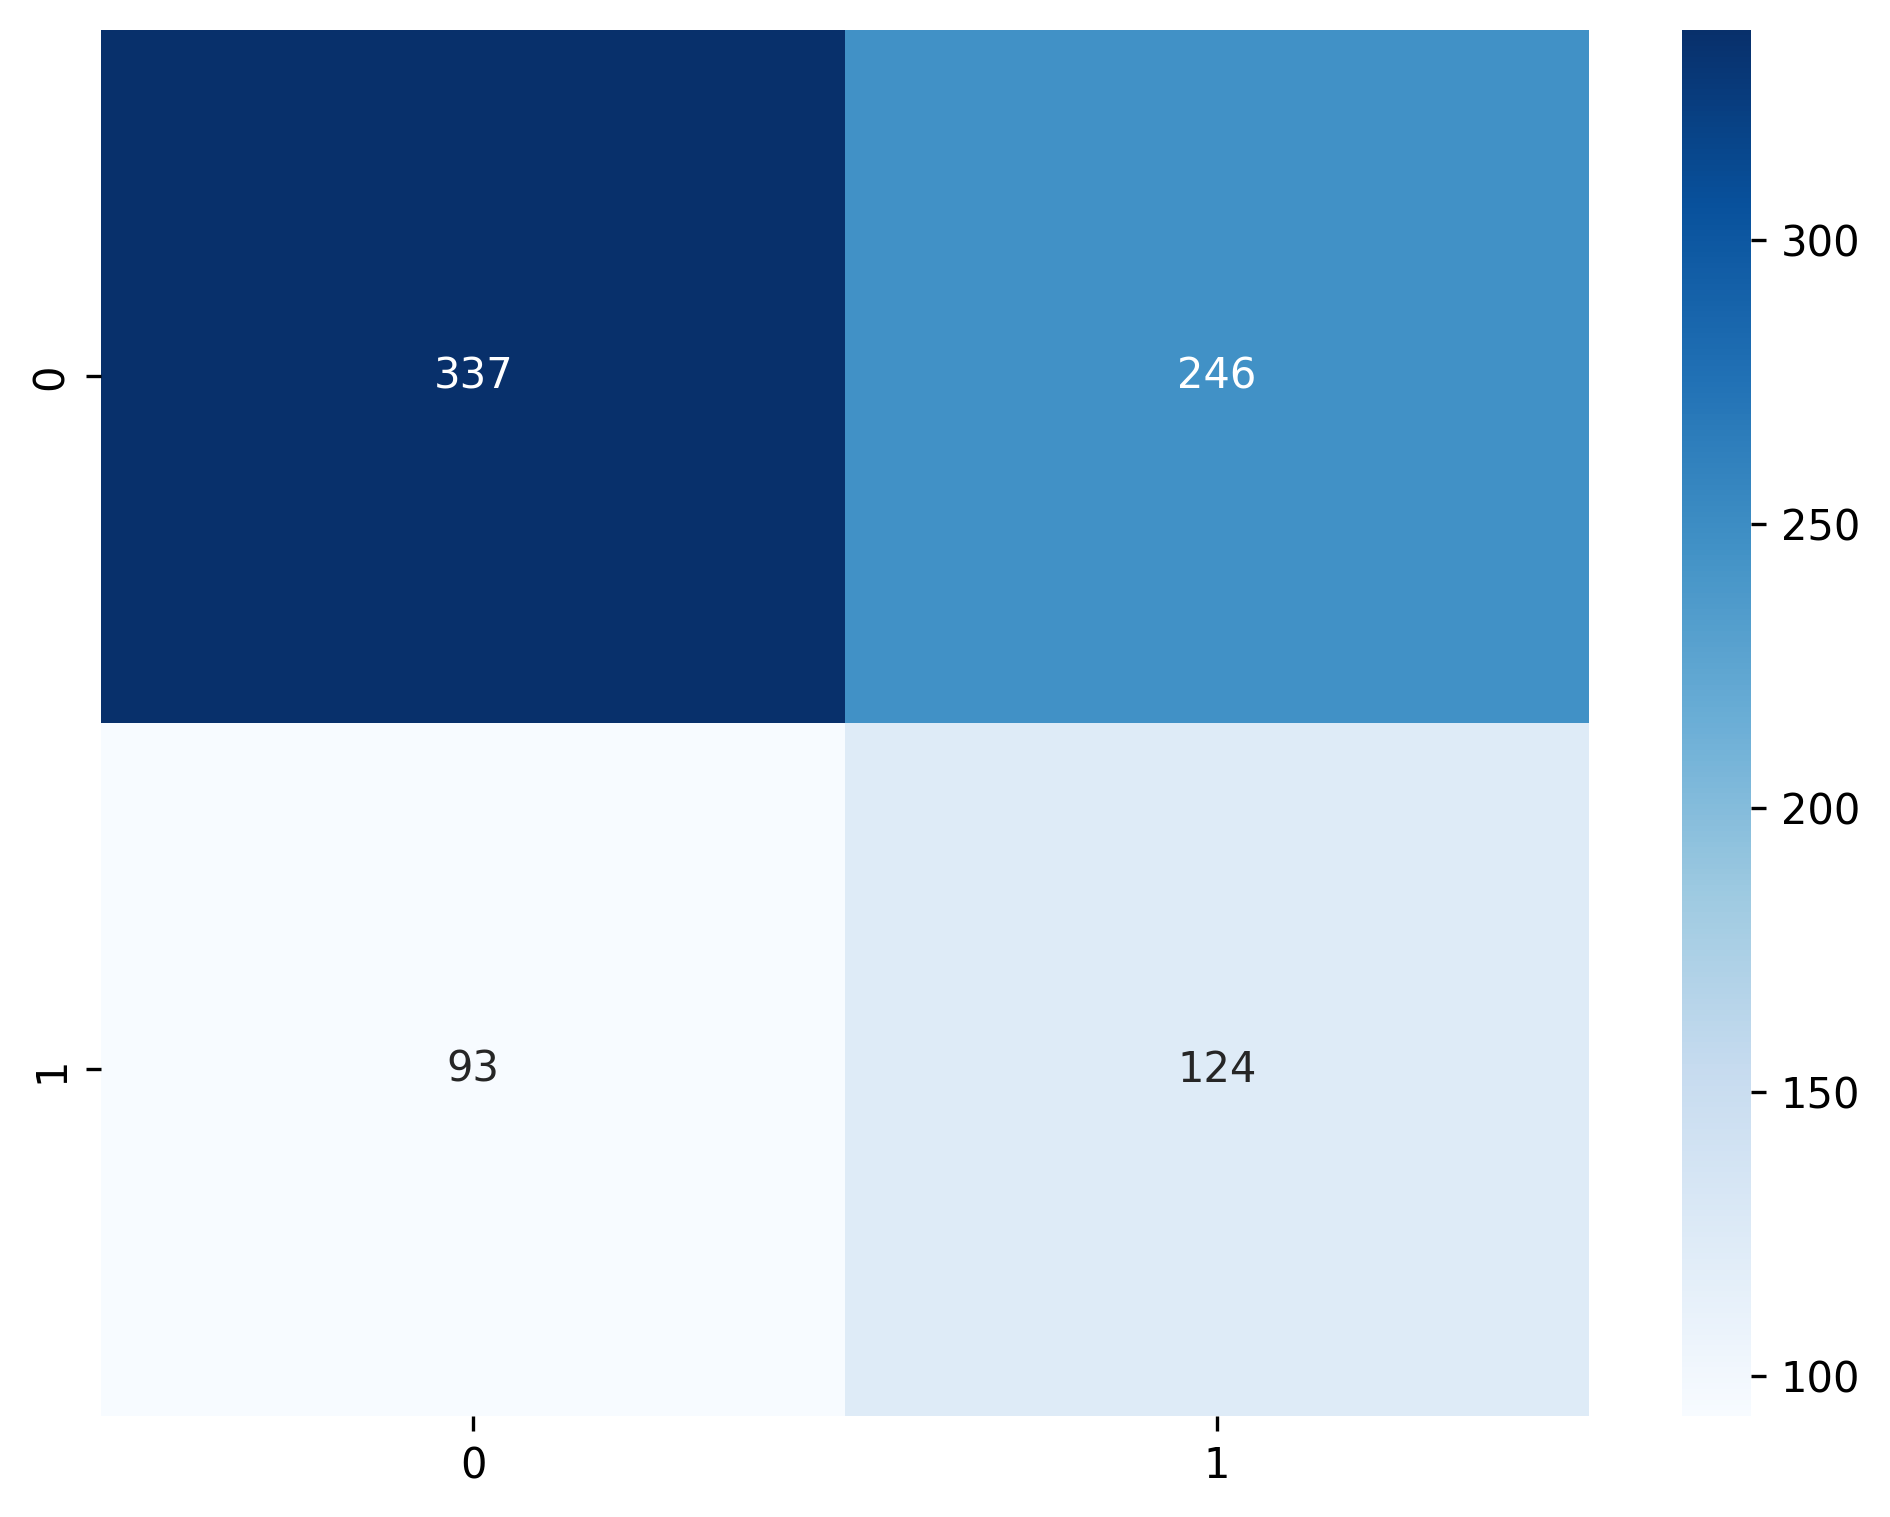

    Lift Curve  Baseline
0     0.000000         0
1    14.285714        10
2    26.267281        20
3    39.631336        30
4    51.152074        40
5    60.829493        50
6    73.271889        60
7    82.949309        70
8    91.705069        80
9    96.774194        90
10  100.000000       100


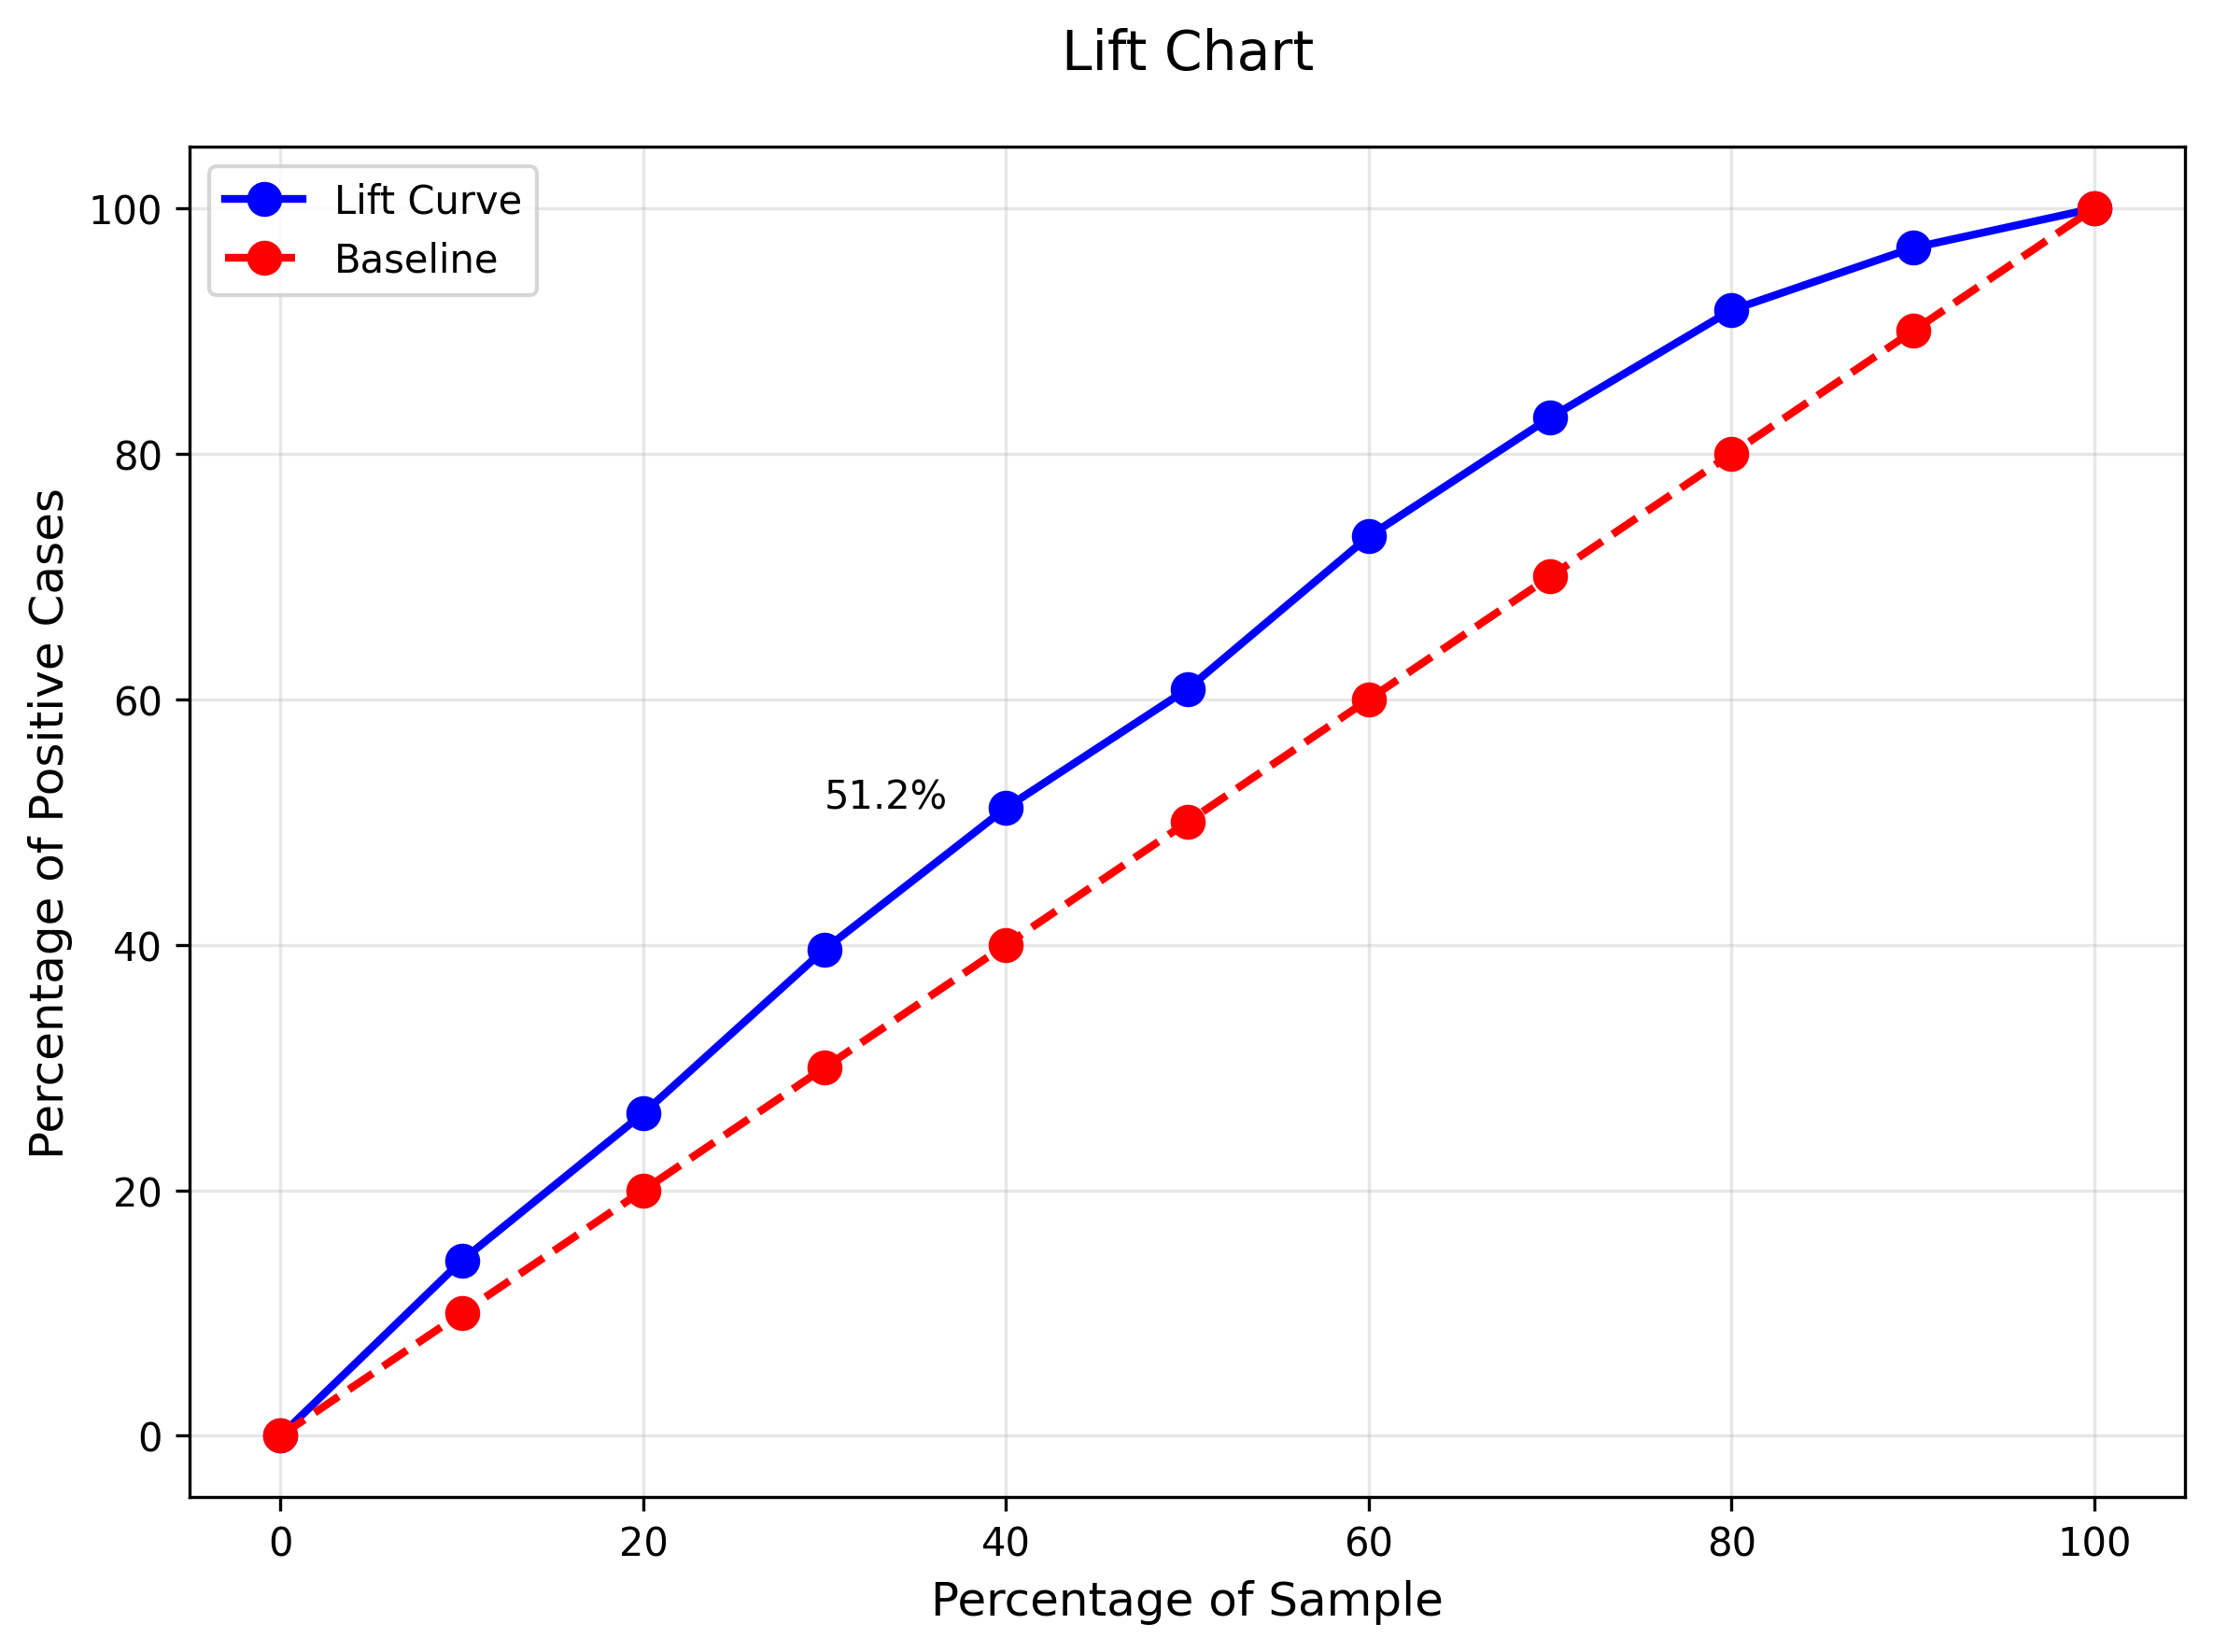

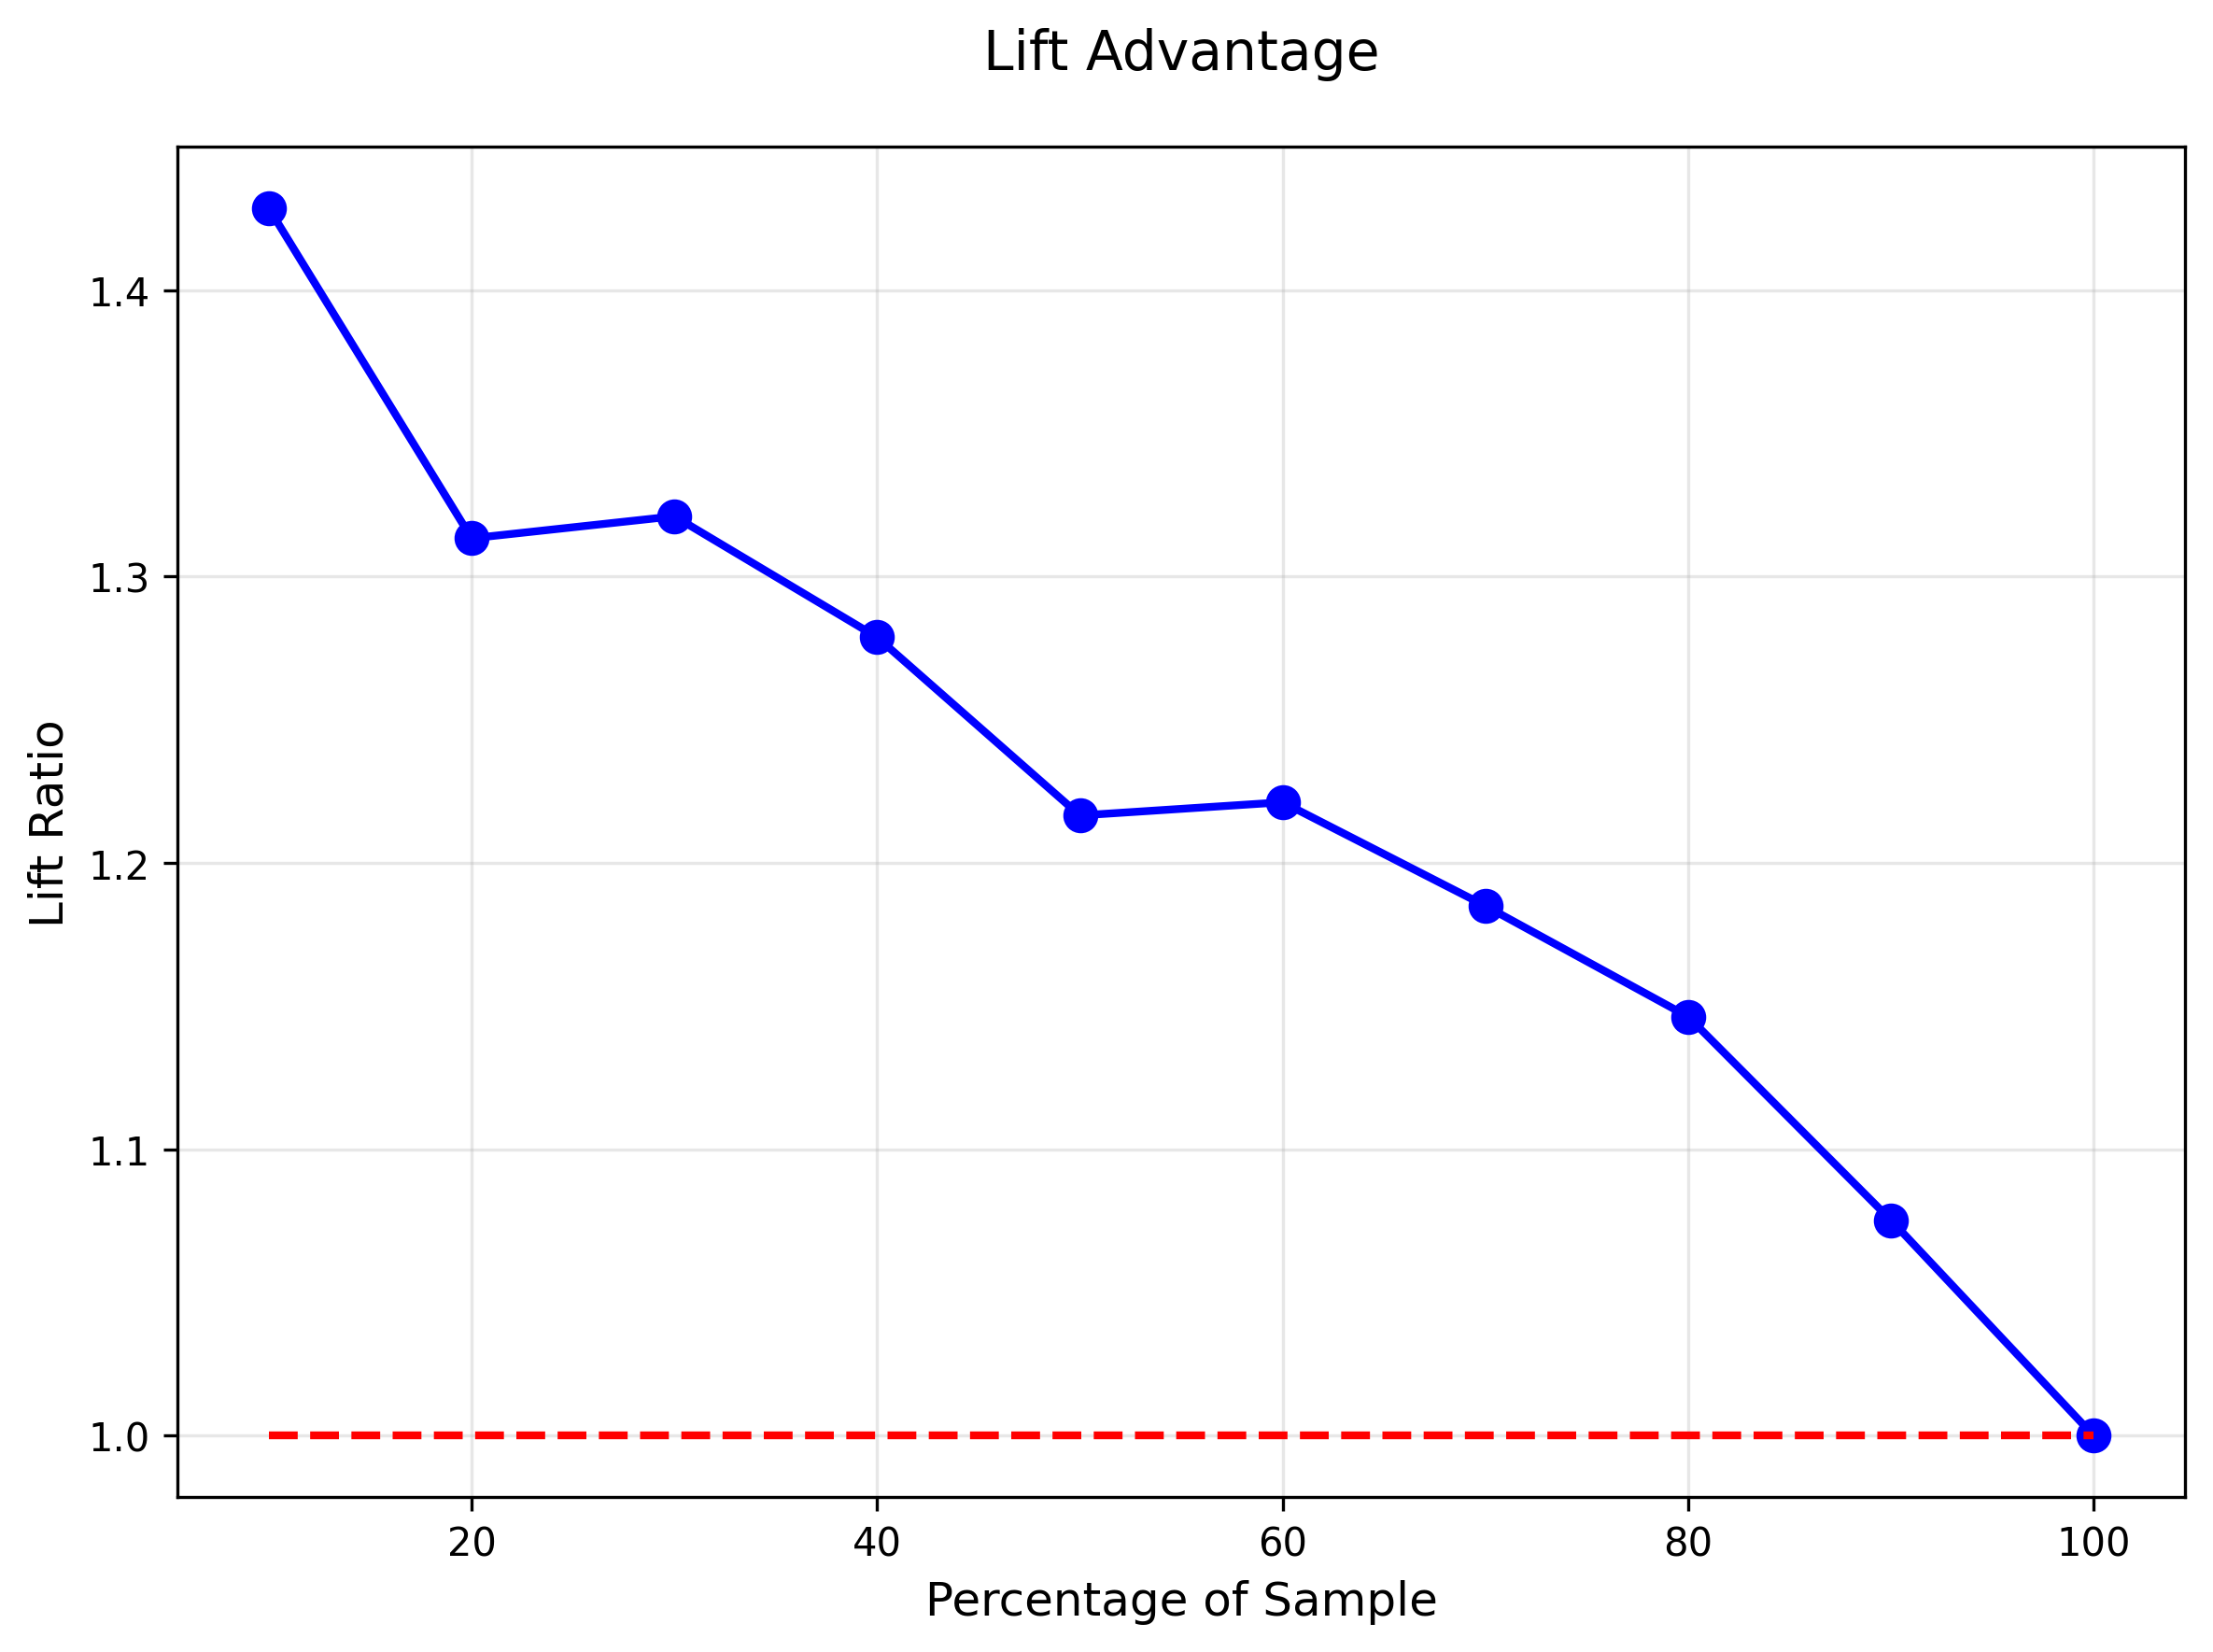

Top predictions sorted by probability:
      age  dist  income  gender  marital_status  target  predicted_probs
2643   82     3   45000       1               1       1         0.955000
1091   83     0   65000       1               1       1         0.953333
156    85     2   45000       1               1       0         0.933333
2561   93     0   25000       0               1       1         0.900000
3962   91     0   55000       1               1       0         0.880000
1732   81     1    5000       0               0       0         0.880000
443    74     1   75000       1               1       1         0.873500
3846   90     0   55000       1               1       0         0.870000
3666   86     4   35000       1               1       0         0.858286
893    81     3   25000       1               1       0         0.850000
3201   82     0   55000       0               1       1         0.850000
3379   82    11   15000       1               1       0         0.845000
811    79   

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(f"Training Accuracy: {rf_model.score(X_train, y_train):.3f}")
print(f"Testing Accuracy: {rf_model.score(X_test, y_test):.3f}")

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_threshold = thresholds[np.argmin(np.abs(tpr - (1-fpr)))]

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {auc(fpr, tpr):.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.legend(fontsize=10)
ax1.tick_params(labelsize=10)

ax2.plot(thresholds, tpr, label='Sensitivity', color='green', lw=2)
ax2.plot(thresholds, 1-fpr, label='Specificity', color='red', lw=2)
ax2.axvline(x=optimal_threshold, color='black', linestyle='--', lw=2)
ax2.legend(fontsize=10)
ax2.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity: {tpr[np.argmin(np.abs(tpr - (1-fpr)))]:.3f}")
print(f"Specificity: {1-fpr[np.argmin(np.abs(tpr - (1-fpr)))]:.3f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, (y_pred_proba >= optimal_threshold).astype(int)), annot=True, fmt='d', cmap='Blues')
plt.show()

test_data = pd.DataFrame(X_test)
test_data['target'] = y_test
test_data['predicted_probs'] = y_pred_proba
test_data_sorted = test_data.sort_values(by='predicted_probs', ascending=False)
total_positives = test_data_sorted['target'].sum()
n_rows = len(test_data_sorted)

lift_curve = [(test_data_sorted.iloc[:int((i/10)*n_rows)]['target'].sum() / total_positives * 100) for i in range(11)]
baseline_curve = [i*10 for i in range(11)]
lift_data = pd.DataFrame({'Lift Curve': lift_curve, 'Baseline': baseline_curve})
print(lift_data)

plt.figure(figsize=(8, 6))
plt.plot(range(0, 101, 10), lift_curve, label='Lift Curve', color='blue', marker='o', lw=2, markersize=8)
plt.plot(range(0, 101, 10), baseline_curve, label='Baseline', color='red', linestyle='--', marker='o', lw=2, markersize=8)
plt.text(30, lift_curve[4], f'{lift_curve[4]:.1f}%', fontsize=10)
plt.xlabel('Percentage of Sample', fontsize=12)
plt.ylabel('Percentage of Positive Cases', fontsize=12)
plt.title('Lift Chart', fontsize=14, pad=20)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

advantage_data = pd.DataFrame({'Lift': np.array(lift_curve[1:])/np.array(baseline_curve[1:])})
plt.figure(figsize=(8, 6))
plt.plot(range(10, 101, 10), advantage_data['Lift'], color='blue', marker='o', lw=2, markersize=8)
plt.plot(range(10, 101, 10), [1]*10, color='red', linestyle='--', lw=2)
plt.xlabel('Percentage of Sample', fontsize=12)
plt.ylabel('Lift Ratio', fontsize=12)
plt.title('Lift Advantage', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

print("Top predictions sorted by probability:")
print(test_data_sorted.head(20))
print("\nRandom sample of predictions:")
print(test_data.sample(frac=1, random_state=42).head(20))

observe this observation taken from the random sample 

In [ ]:
#        age  dist  income  gender  marital_status  target  predicted_probs
# 3782   84     1   45000       0               1       0         0.086667

age, dist, income, and marital_status are all within the range where observed response probability is best, yet the predicted probability is 10% Is this reasonable? 

In [34]:
filtered_data = data[
    (data['age'].between(79, 85)) & 
    (data['gender'] == 0) & 
    (data['marital_status'] == 1) & 
    (data['income'].between(0, 65000)) &
    (data['dist'].between(0, 5))
]

print("\nFiltered observations matching criteria:")
print(filtered_data[['target', 'age', 'gender', 'marital_status', 'income', 'dist']])
print(f"\nResponse rate in filtered data: {filtered_data['target'].mean():.2%}")


Filtered observations matching criteria:
      target  age  gender  marital_status  income  dist
56         1   81       0               1   15000     1
66         0   84       0               1   35000     1
92         1   80       0               1   35000     1
126        1   82       0               1   55000     0
143        0   82       0               1   35000     3
145        0   79       0               1   25000     2
234        1   82       0               1   45000     1
260        0   85       0               1   25000     0
286        1   85       0               1   35000     4
349        1   84       0               1   35000     0
386        0   79       0               1   65000     2
398        1   79       0               1   35000     0
411        0   82       0               1   55000     1
474        0   79       0               1   65000     0
583        1   82       0               1   15000     4
638        1   83       0               1   55000     2
675   

when this subset was only males it was 52.25%, when females its 47%. This is the second best subset of the data set for response and yet its assigning a rock bottom probability of response for one of its observation. What does this mean? 

Random Forest is looking for hyper-granular trends in variables which yield high responses, of which it falsely identified the male. The best way to predict for response in this data is by broad trends of higher 